In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [2]:
data = pd.read_csv('data/winemag-data_first150k.csv')

# 1.打印表格基本属性

In [3]:
print('记录:', data.shape[0]-1, '  字段:', data.shape[1])

记录: 150929   字段: 11


# 2.显示前五项记录进行观察

In [4]:
data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# 3.查看每个字段的缺失情况

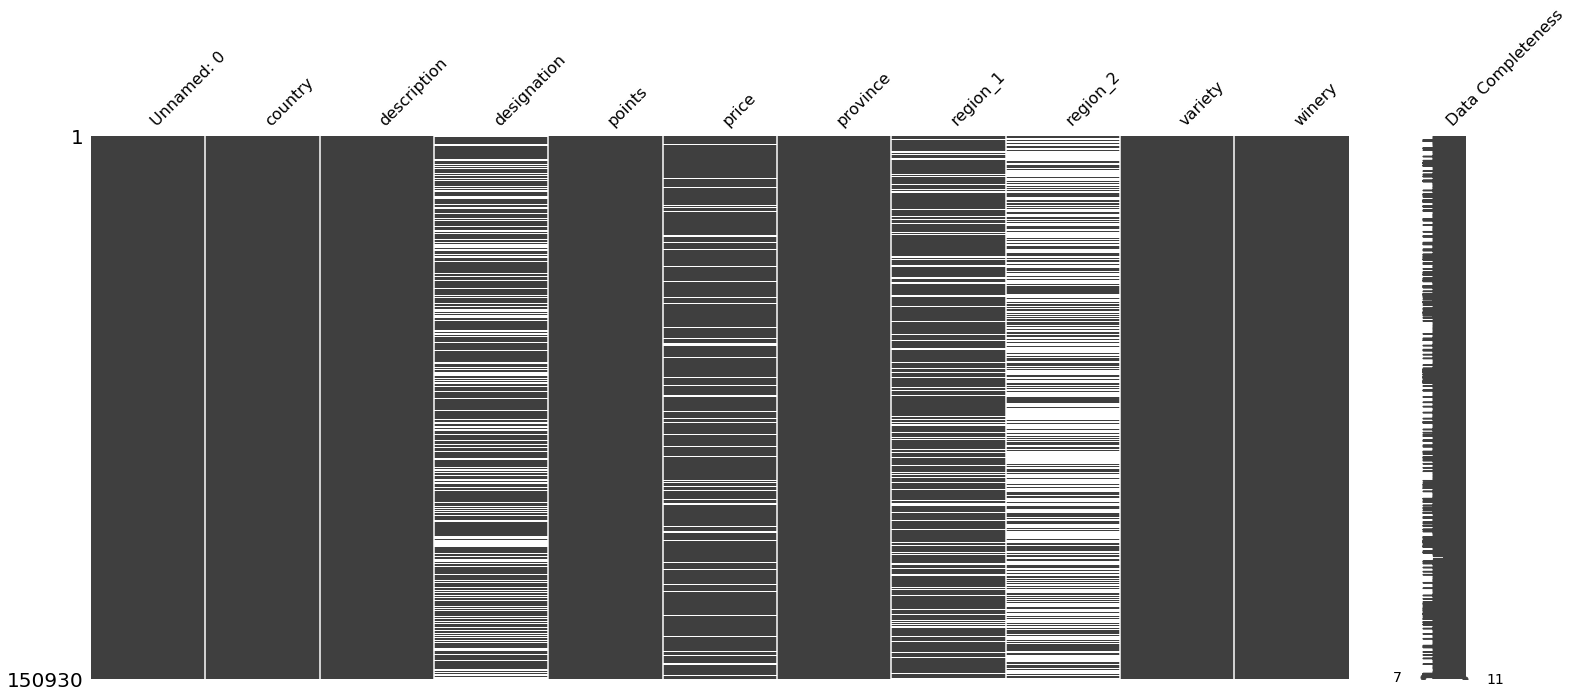

In [5]:
msno.matrix(data, labels=True)

### 上图中白线越多，表示数据缺失越严重，按数据缺失的严重程度由高到低排序，依次是'region_2'、'designation'、'region_1、'price'，其他字段基本没有数据缺失

### 对缺失值先填充'NONE'

In [6]:
data = data.fillna('NONE')

# 4.对标称属性country进行分析

## 4.1绘制原始数据直方图

In [7]:
country = data['country'].value_counts()

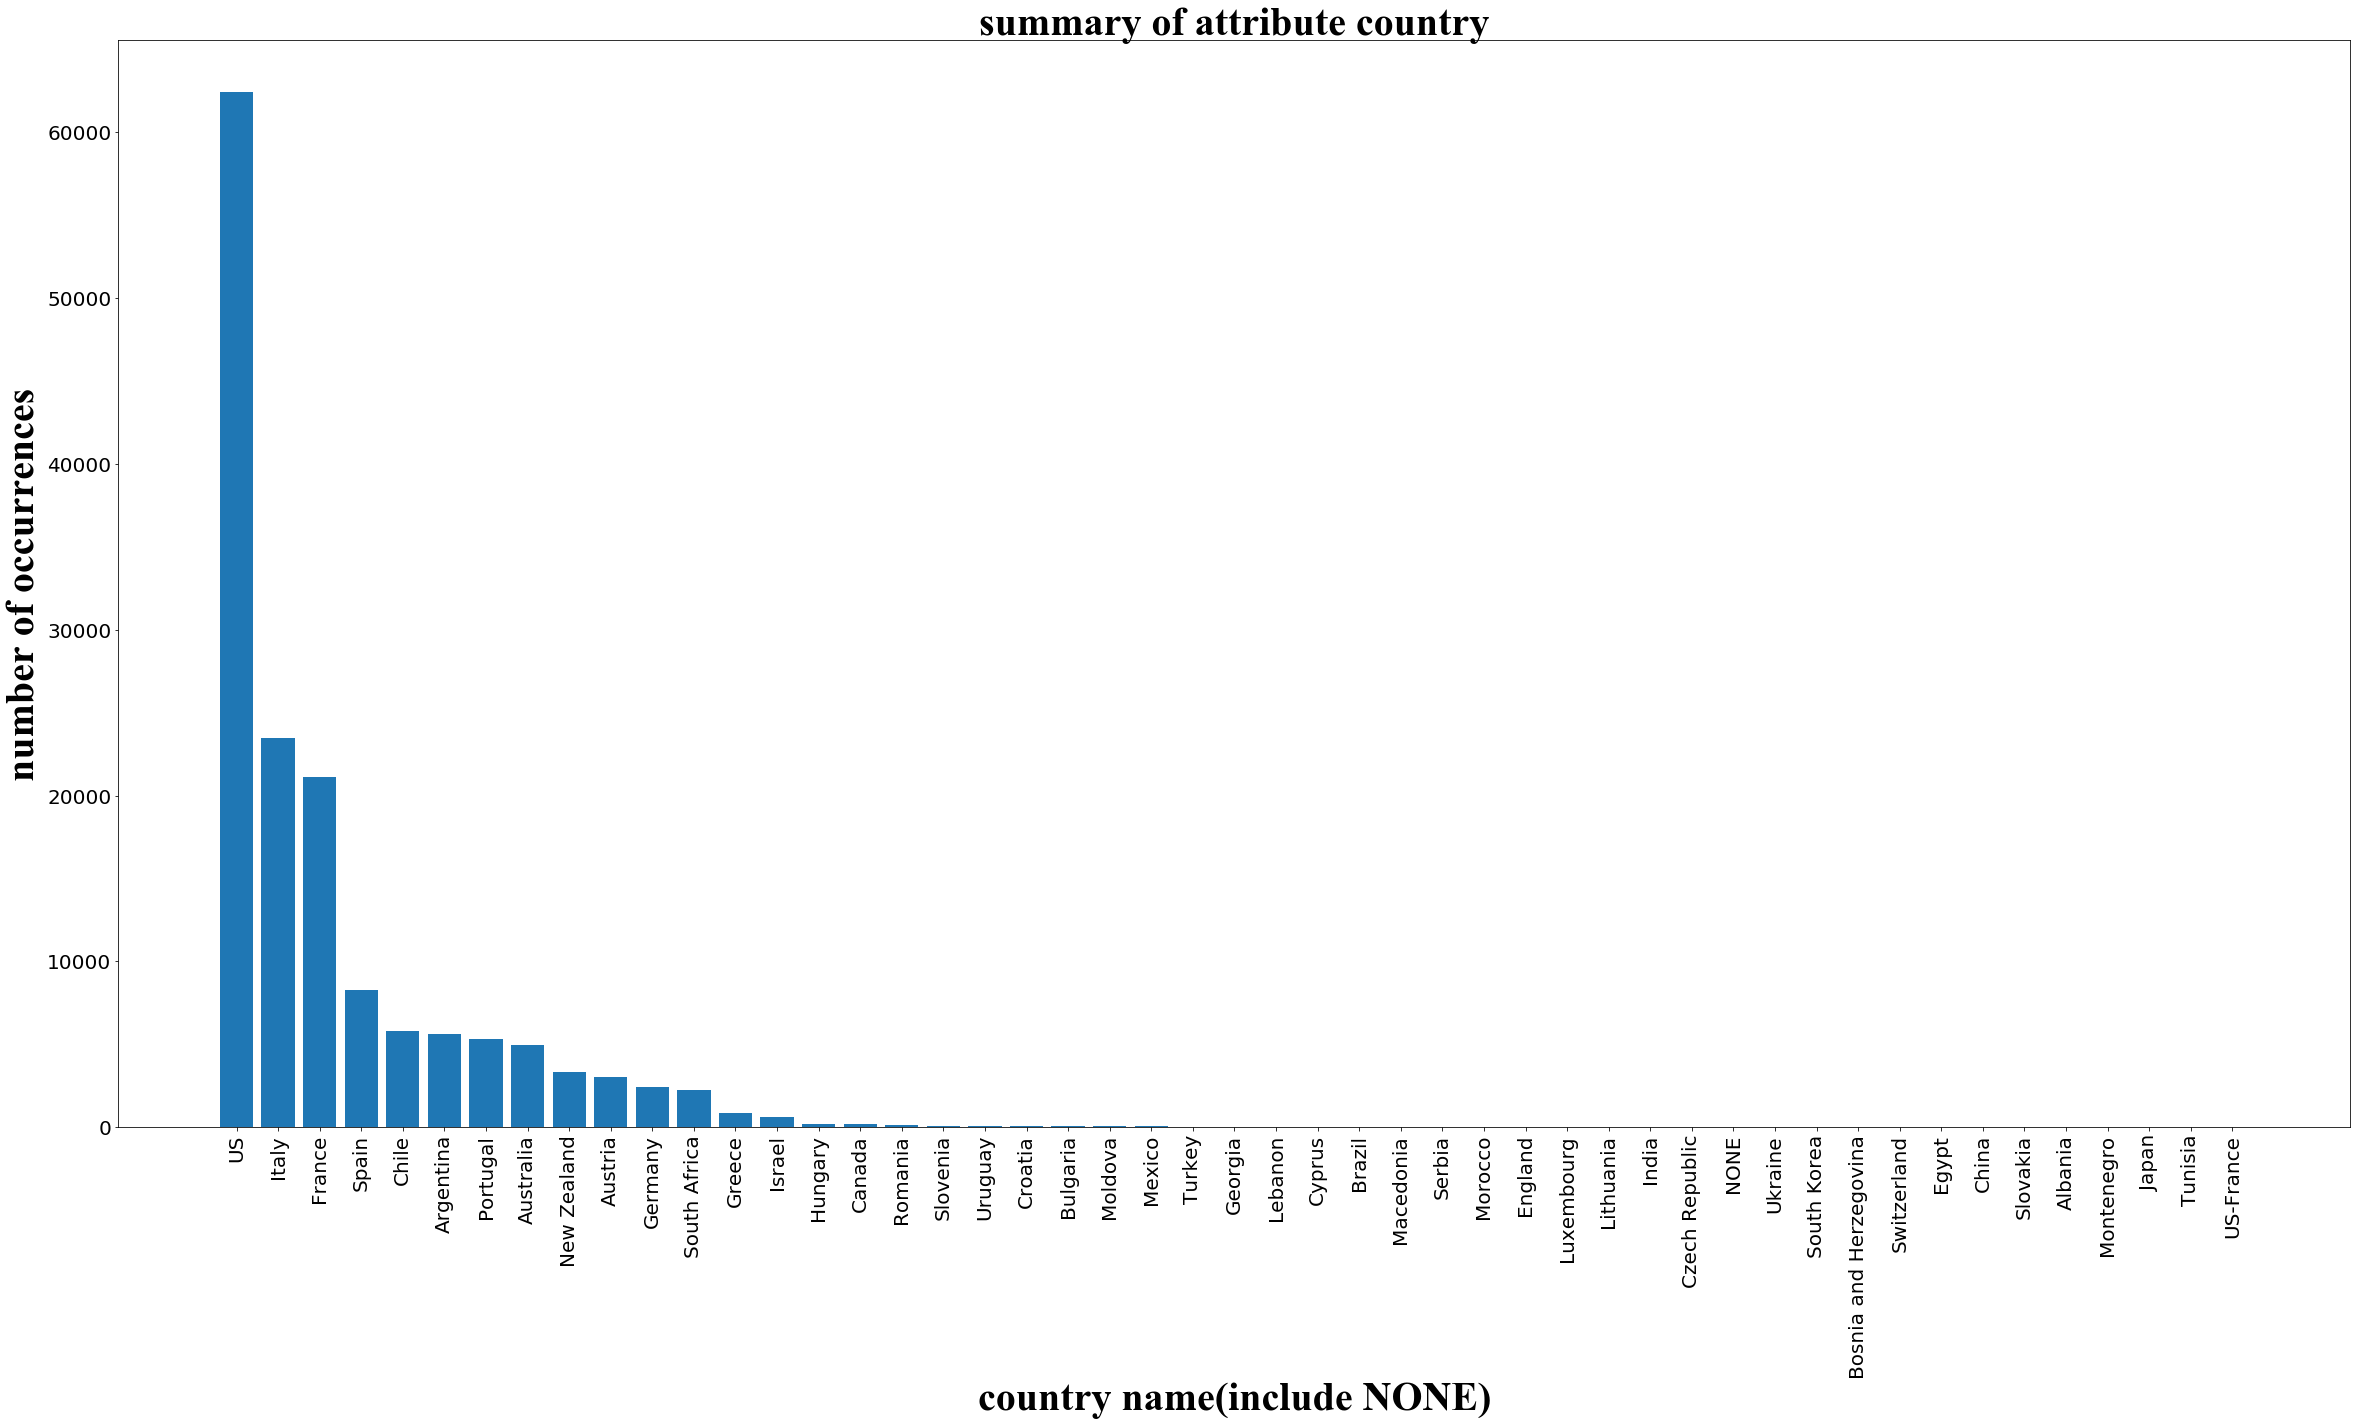

In [8]:
x_con = country.index
y_con = country.values
plt.figure(figsize=(40,20))
plt.bar(x_con, y_con)
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('country name(include NONE)', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute country', font)
plt.show()

### 可以看到，国家出现频次较多的依次是US、Italy、France，其他国家相对较少

## 4.2检查数据缺失并处理

In [9]:
print('country数据缺失总数： ',len(data[data['country'] == 'NONE']))

country数据缺失总数：  5


### 'country'属性的缺失值数量为5

### 4.2.1剔除缺失数据

In [10]:
country_s1 = country.drop('NONE')

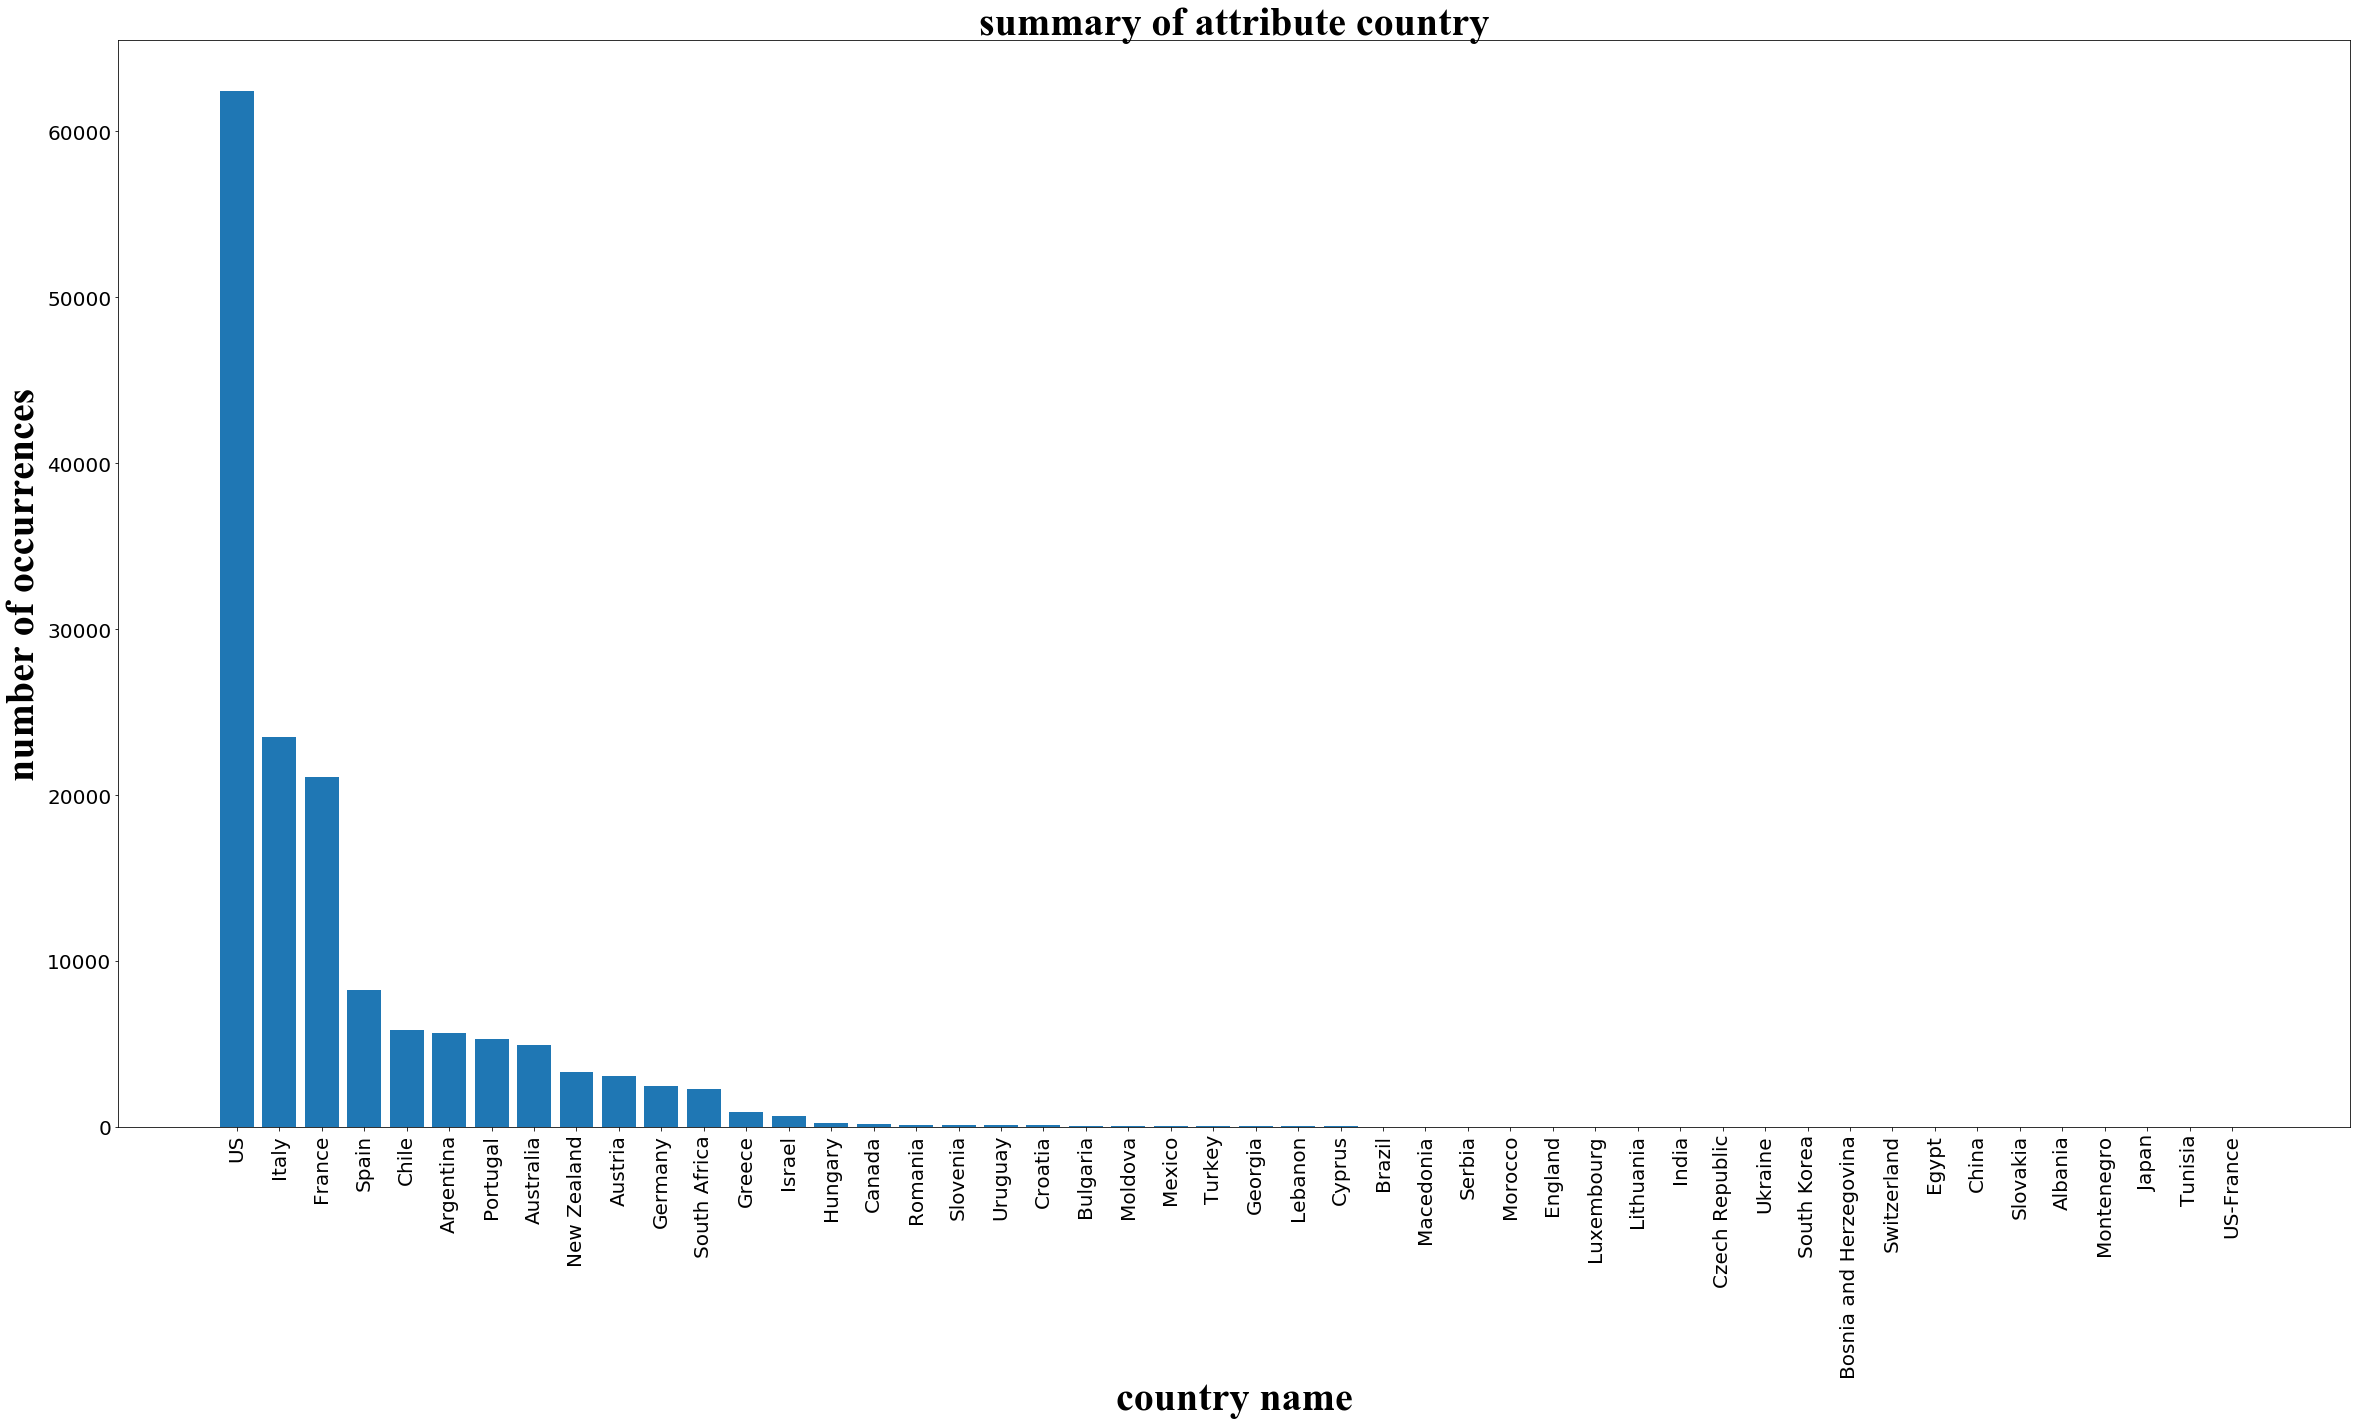

In [11]:
x_con = country_s1.index
y_con = country_s1.values
plt.figure(figsize=(40, 20))
plt.bar(x_con, y_con)
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('country name', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute country', font)
plt.show()

### 可以看到，删除缺失数据之后，'Ukraine'之后少了'NONE'变量，但由于缺失数据太少，对整体没有什么影响

### 4.2.2用最高频率填补缺失数据

### 最高频率为'US'，将缺失值填充为'US'

In [12]:
country_s2 = data['country'].replace('NONE', 'US').value_counts()

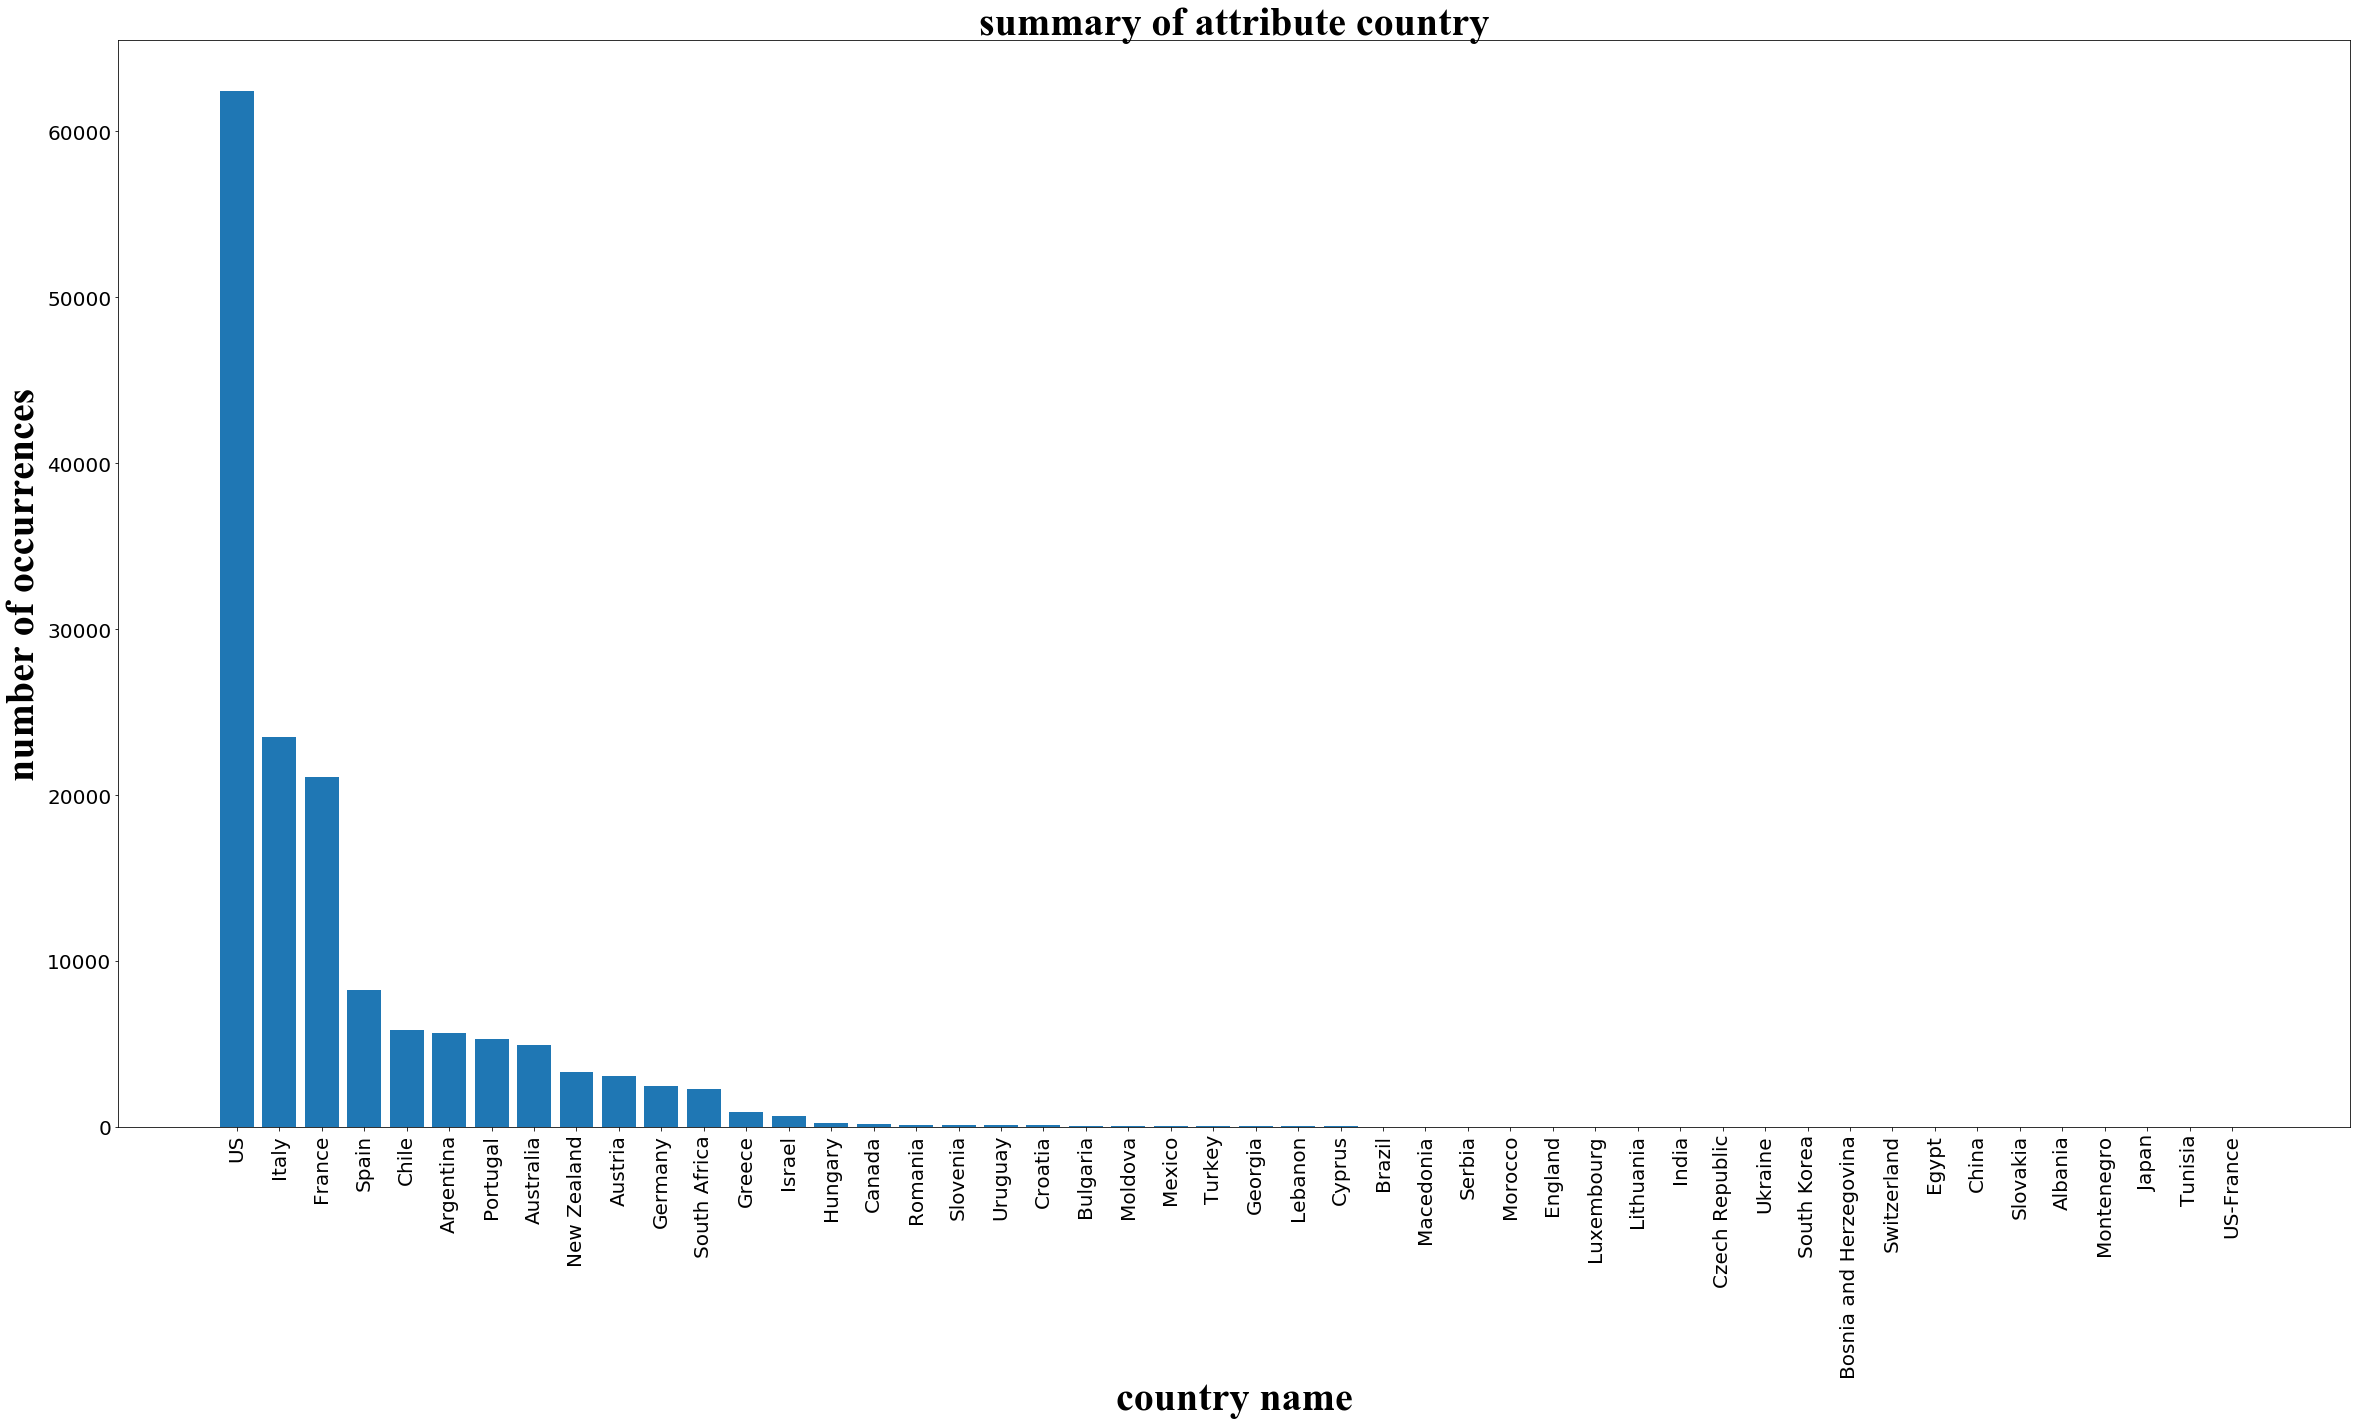

In [13]:
x_con = country_s2.index
y_con = country_s2.values
plt.figure(figsize=(40, 20))
plt.bar(x_con, y_con)
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('country name', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute country', font)
plt.show()

### 缺失数据仅有5项，填充之后没有什么大的改变

### 4.2.3通过属性的相关关系填补缺失值

In [14]:
data[data['country'] == 'NONE']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,1133,NONE,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17,NONE,NONE,NONE,Assyrtiko,Tsililis
1440,1440,NONE,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30,NONE,NONE,NONE,Red Blend,Büyülübağ
68226,68226,NONE,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15,NONE,NONE,NONE,Pinot Noir,Chilcas
113016,113016,NONE,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15,NONE,NONE,NONE,Pinot Noir,Chilcas
135696,135696,NONE,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15,NONE,NONE,NONE,Pinot Noir,Chilcas


### 可以看到，由于province、region_1、region_2属性均为缺失状态，因此无法通过相关关系填补缺失值

# 5.根据数据来源的说明，'description'这一项没有特点，基本上每个记录的该项都不相同，因此不对其进行分析

# 6.对标称属性'designation'进行分析

In [39]:
design = data['designation'].value_counts()

## 6.1绘制直方图

### 由于其变量太多，选择频率最高的20项进行可视化

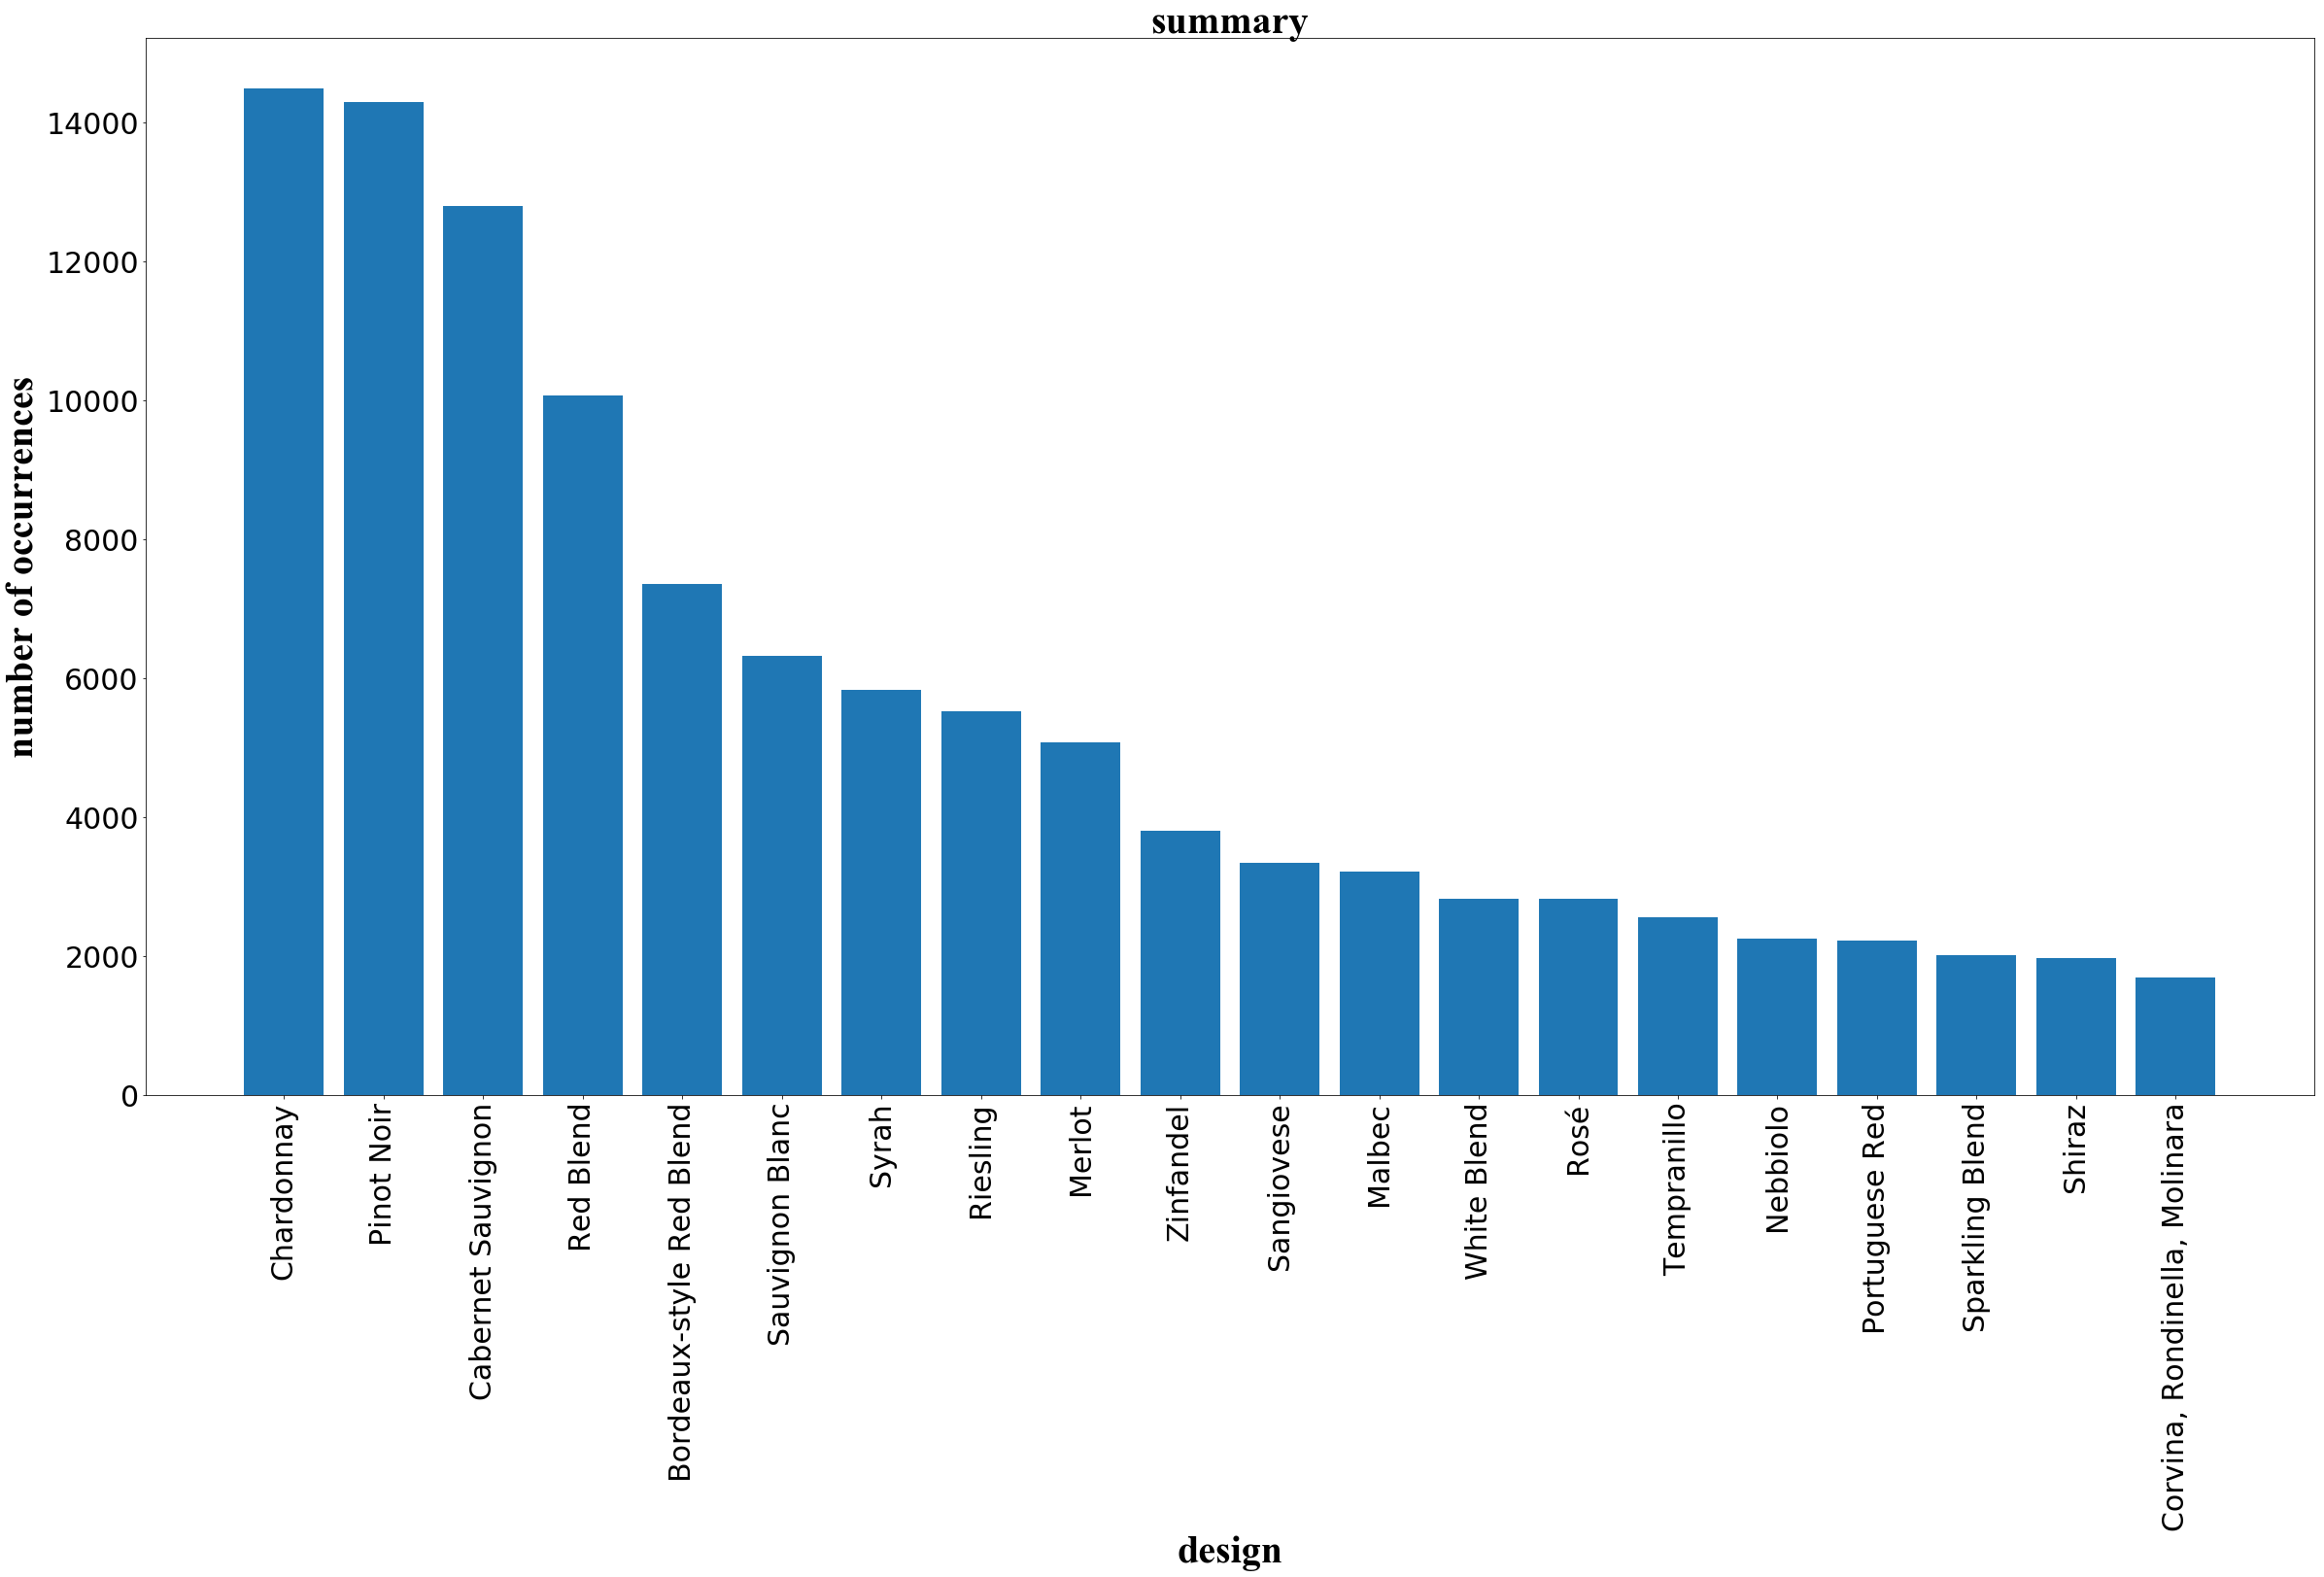

In [144]:
x_des = []
y_des = []
for i in range(20):
    x_des.append(design.index[i])
    y_des.append(design[i])
plt.figure(figsize=(40,20))
plt.bar(x_des, y_des)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('design', font)
plt.ylabel('number of occurrences', font)
plt.title('summary', font)
plt.show()

## 6.2检查数据缺失并处理

In [43]:
print('designation数据缺失总数： ',len(data[data['designation'] == 'NONE']))

designation数据缺失总数：  45735


### 6.2.1剔除缺失数据

In [45]:
design_s1 = design.drop('NONE')

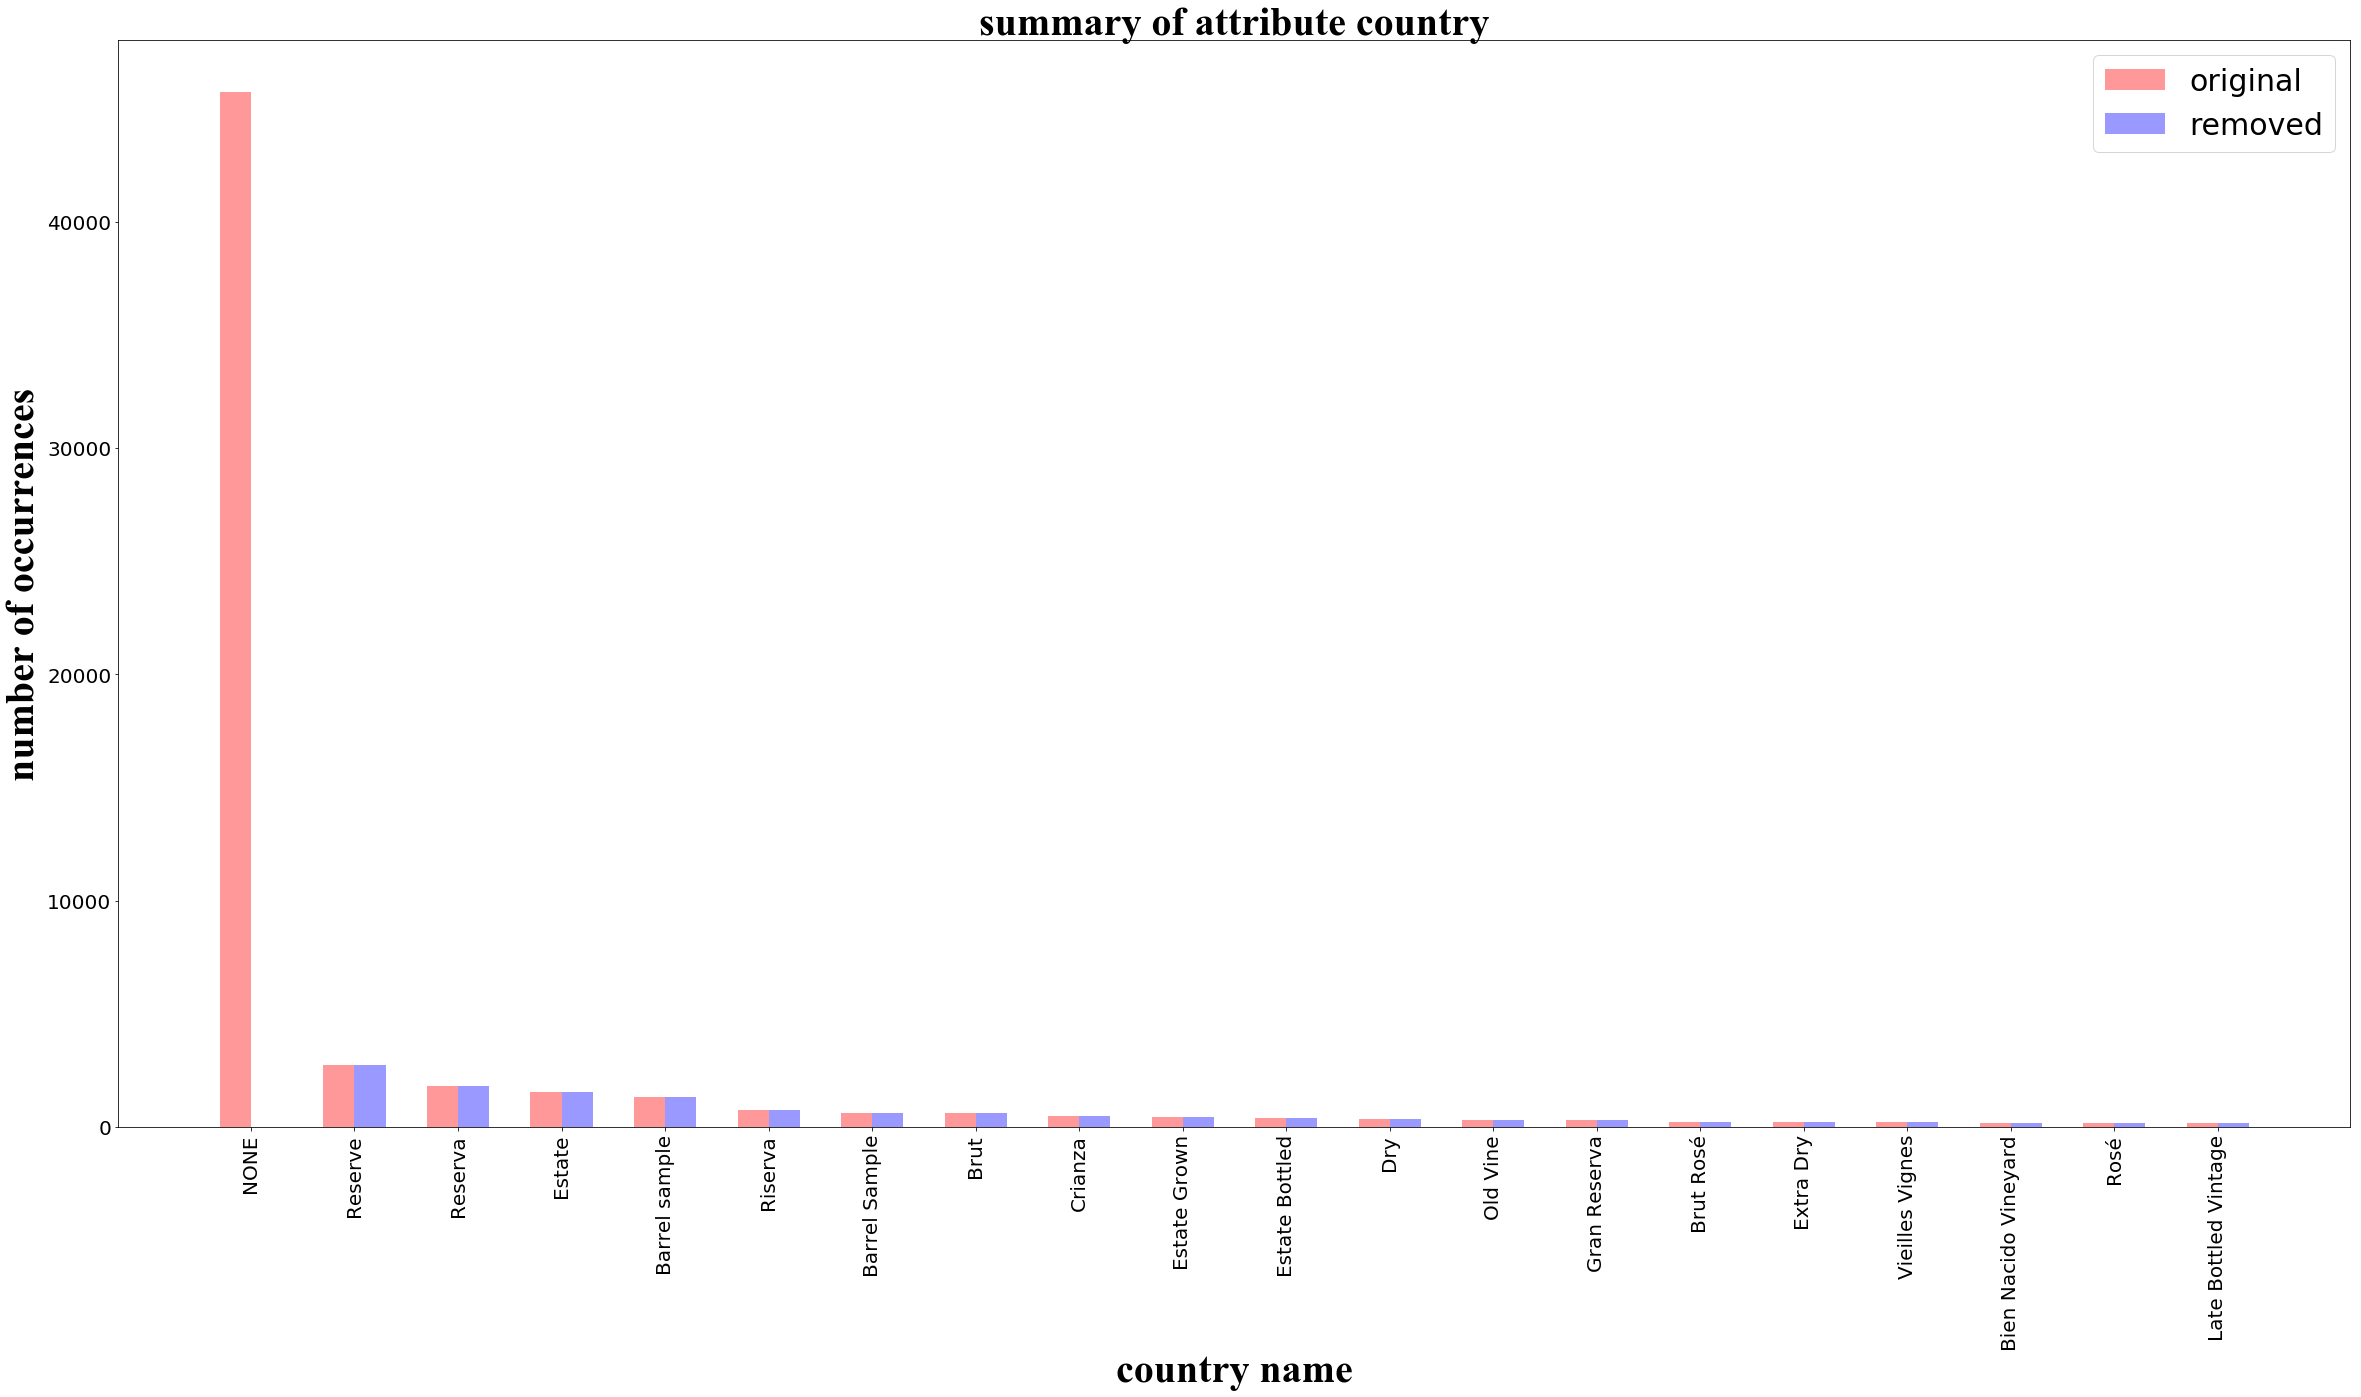

In [101]:
y_des1 = [0]
for i in range(1, 20):
    y_des1.append(design[i])
plt.figure(figsize=(40, 20))
bar_wid = 0.3
x_index = np.arange(20)
plt.bar(x_index, y_des, width=bar_wid, alpha=0.4, color="r", label='original')
plt.bar(x_index+bar_wid, y_des1, width=bar_wid, alpha=0.4, color="b", label='removed')
plt.xticks(x_index + bar_wid/2, x_des, rotation=90)
plt.tick_params(labelsize=20)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('country name', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute country', font)
plt.legend(fontsize=30)
plt.show()

### 6.2.2用最高频率填补缺失数据

### 最高频率为'US'，将缺失值填充为'US'

In [83]:
design_s2 = data['designation'].replace('NONE', 'Reserve').value_counts()

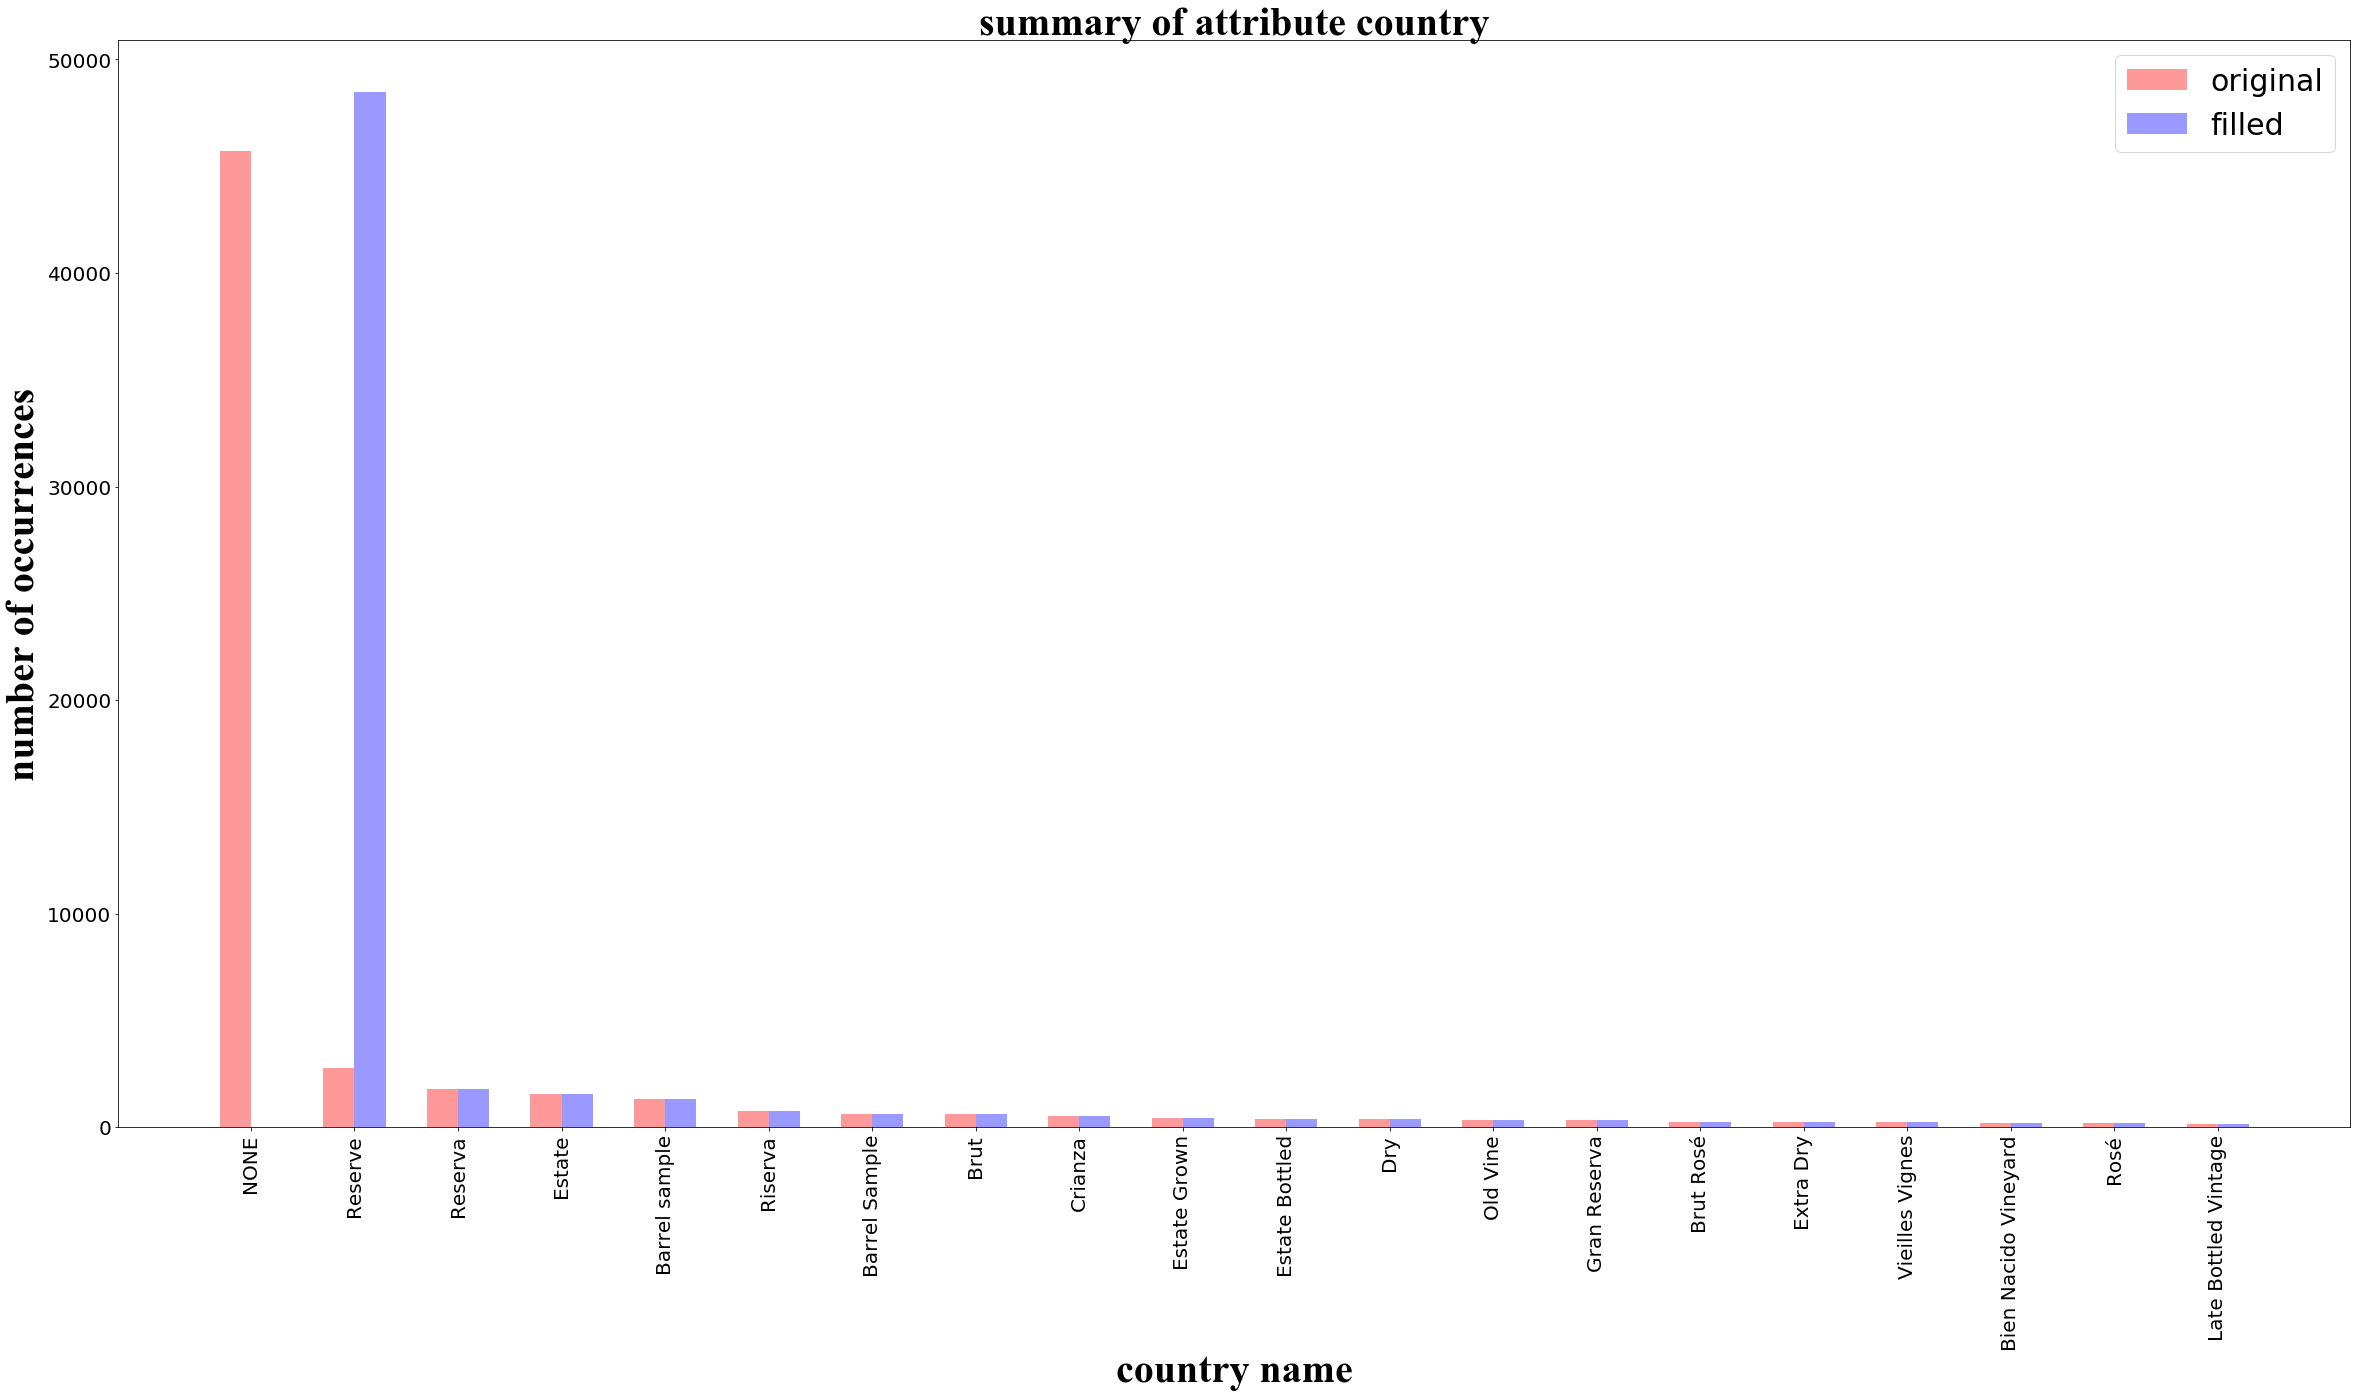

In [102]:
y_des2 = [0]
for i in range(19):
    y_des2.append(design_s2[i])
plt.figure(figsize=(40, 20))
bar_wid = 0.3
x_index = np.arange(20)
plt.bar(x_index, y_des, width=bar_wid, alpha=0.4, color="r", label='original')
plt.bar(x_index+bar_wid, y_des2, width=bar_wid, alpha=0.4, color="b", label='filled')
plt.xticks(x_index + bar_wid/2, x_des, rotation=90)
plt.tick_params(labelsize=20)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('country name', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute country', font)
plt.legend(fontsize=30)
plt.show()

# 7.对数值属性points进行分析

In [89]:
points = data['points'].value_counts()

In [90]:
print(points)

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64


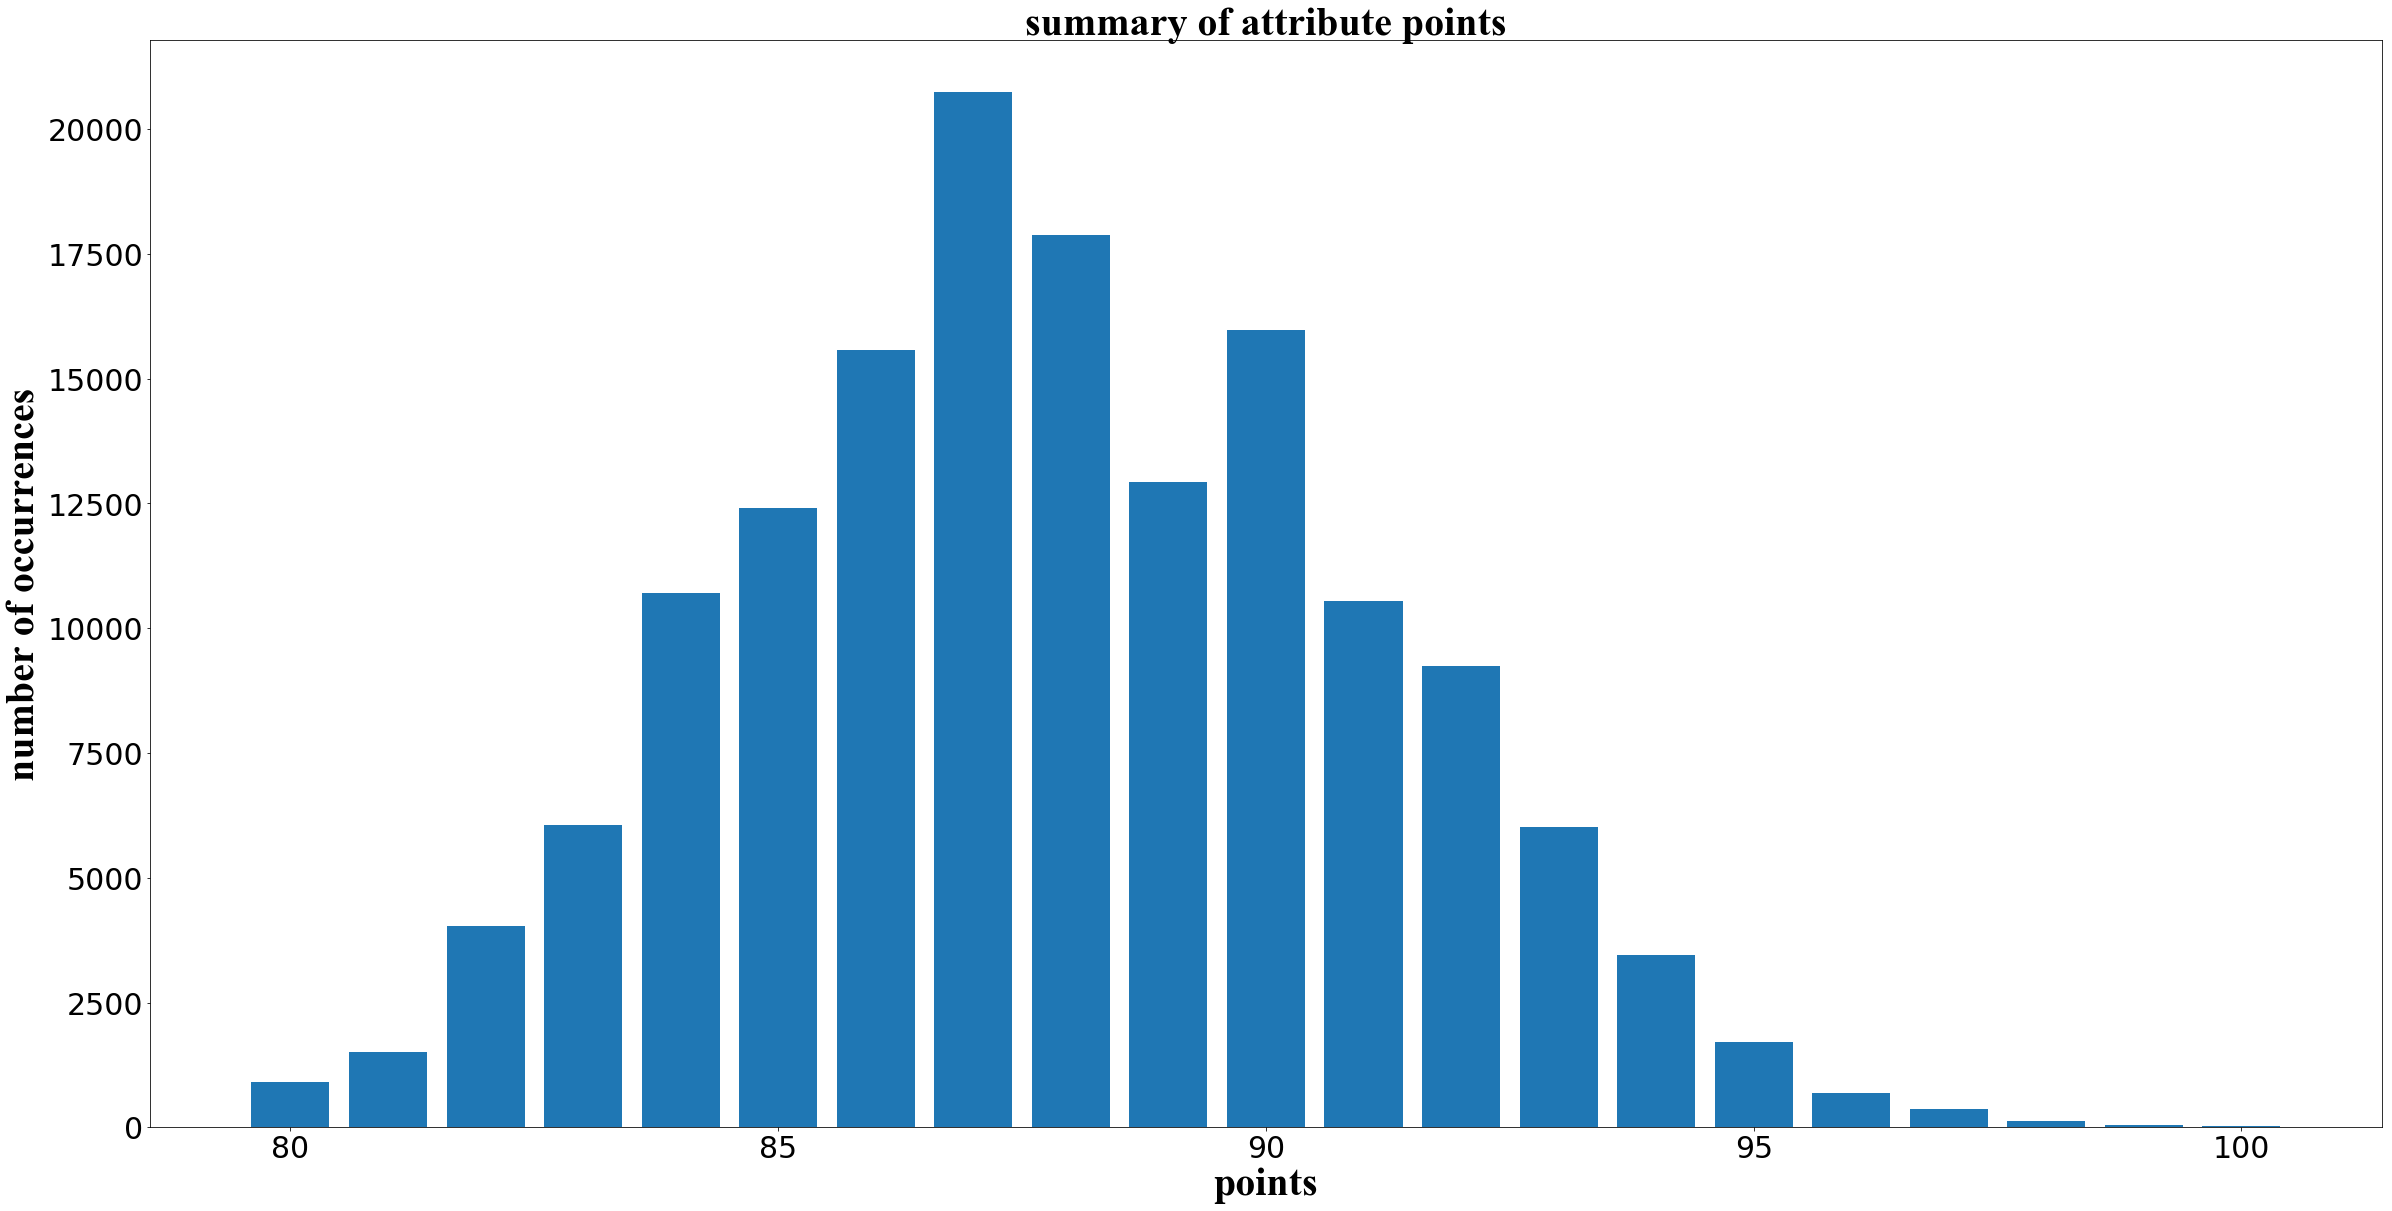

In [91]:
x_poi = points.index
y_poi = points.values
plt.figure(figsize=(40,20))
plt.bar(x_poi, y_poi)
plt.tick_params(labelsize=30)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('points', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute points', font)
plt.show()

## 7.1五数概括及盒图

In [93]:
def five(l):
    mini = np.percentile(l, 0)
    Q1 = np.percentile(l, 25)
    Q2 = np.percentile(l, 50)
    Q3 = np.percentile(l, 75)
    maxi = np.percentile(l, 100)
    print('最小值：',mini)
    print('Q1：',Q1)
    print('Q2：',Q2)
    print('Q3：',Q3)
    print('最大值：',maxi)

In [96]:
five(points.index.tolist())

最小值： 80.0
Q1： 85.0
Q2： 90.0
Q3： 95.0
最大值： 100.0


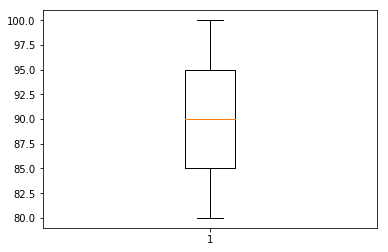

In [92]:
plt.boxplot(points.index, notch=False, sym='r', vert=True)
plt.show()

## 7.2points不存在缺失值

# 8.对数值属性price进行分析

In [105]:
price = data['price'].value_counts()

## 8.1五数概括和盒图

In [108]:
five(price.drop('NONE').index.tolist())

最小值： 4.0
Q1： 93.0
Q2： 183.0
Q3： 317.0
最大值： 2300.0


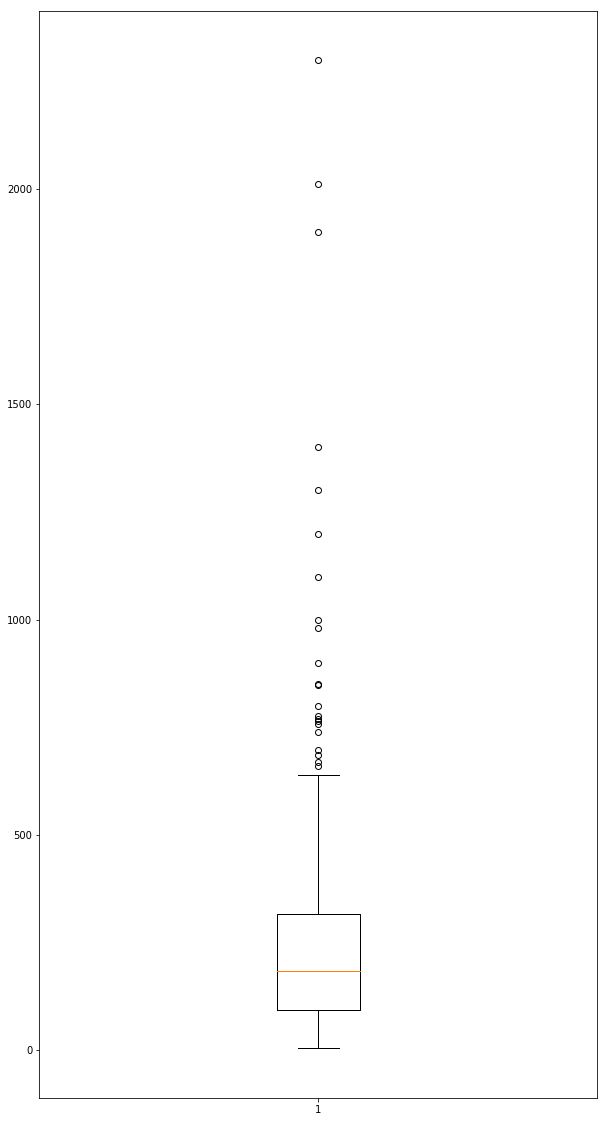

In [111]:
plt.figure(figsize=(10,20))
plt.boxplot(price.drop('NONE').index.tolist())
plt.show()

### 可以看到大部分价格集中在0-200之间，向上的离群点较多

## 8.2检查数据缺失并处理

In [125]:
print('price数据缺失总数： ',len(data[data['price'] == 'NONE']))

price数据缺失总数：  13695


### 8.2.1剔除缺失部分的效果与原始一样

### 8.2.2用最高频率填充

In [128]:
print(price.index[1])

20.0


In [135]:
price_s2 = data['price'].replace('NONE', 20.0).value_counts()

### 五数概括和盒图对比

In [136]:
five(price_s2.index.tolist())

最小值： 4.0
Q1： 93.0
Q2： 183.0
Q3： 317.0
最大值： 2300.0


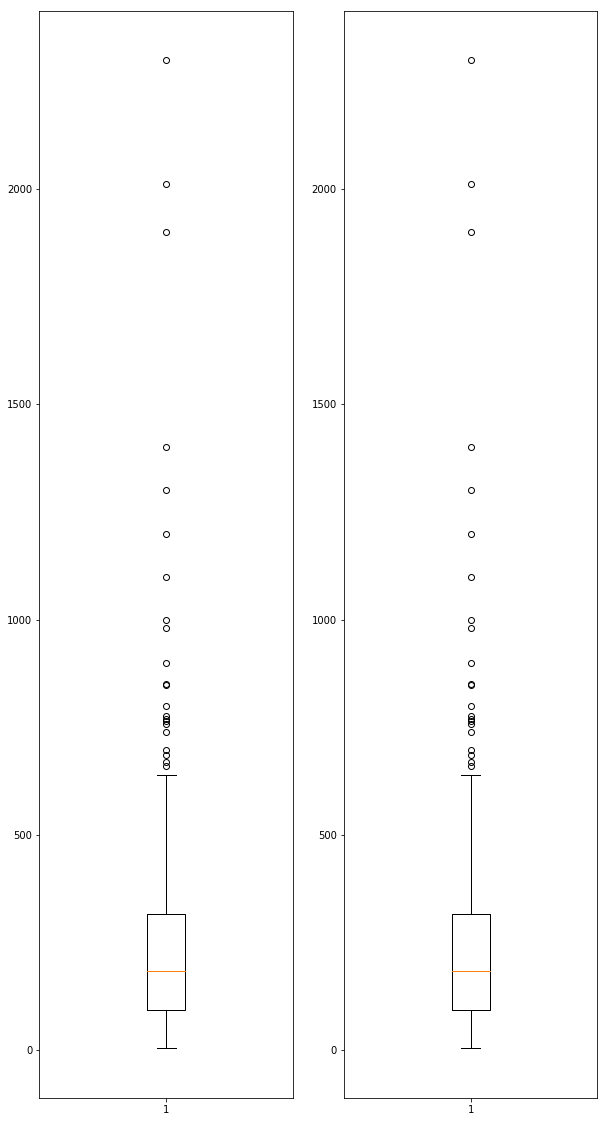

In [138]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.boxplot(price.drop('NONE').index.tolist())
plt.subplot(1,2,2)
plt.boxplot(price_s2.index.tolist())
plt.show()

# 9.省份部分对出现较多的几个国家进行分析：美国、意大利和法国

In [114]:
US = data[data['country'].isin(['US']) == True]

In [115]:
US_province = US[pd.notnull(US['province'])].groupby(by='province').count().iloc[:,0]

In [116]:
print(US_province)

province
America                 27
Arizona                 39
California           44508
Colorado                30
Connecticut              2
Idaho                  136
Iowa                     4
Kentucky                 4
Massachusetts           10
Michigan                25
Missouri                60
Nevada                   1
New Jersey              24
New Mexico              95
New York              2428
North Carolina          20
Ohio                    34
Oregon                4589
Pennsylvania            50
Texas                   41
Vermont                  2
Virginia               515
Washington            9750
Washington-Oregon        3
Name: Unnamed: 0, dtype: int64


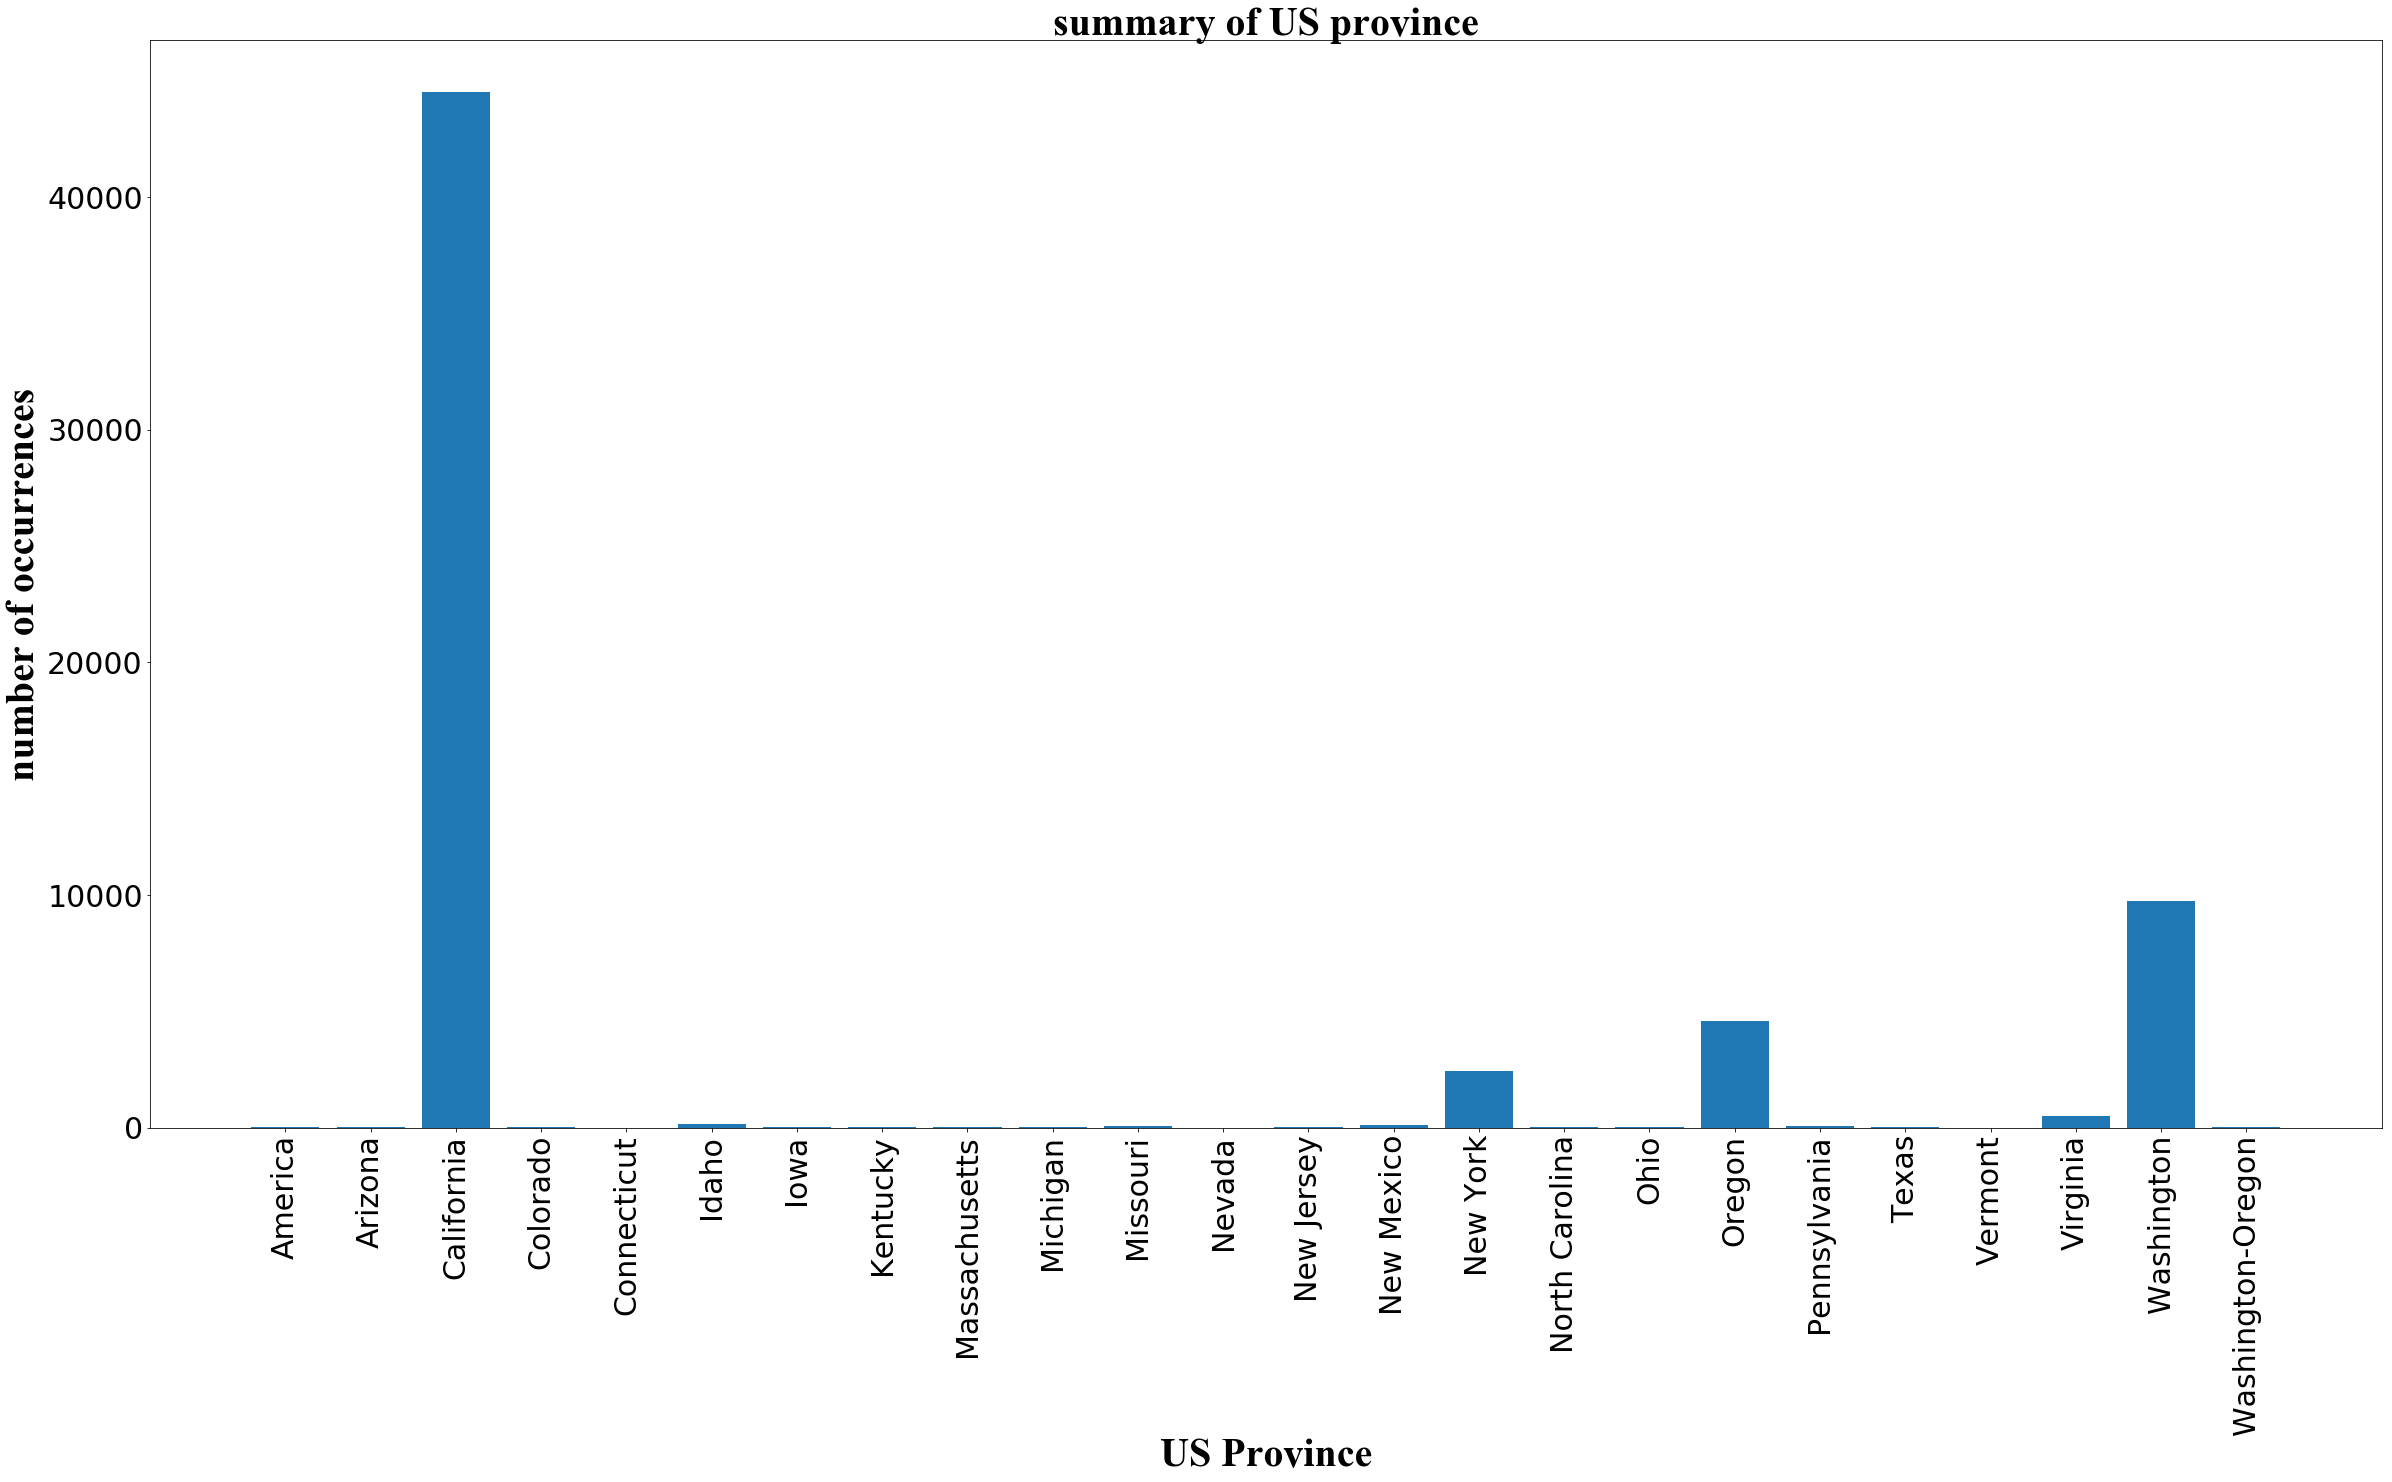

In [117]:
x_us_pro = US_province.index
y_us_pro = US_province.values
plt.figure(figsize=(40,20))
plt.bar(x_us_pro, y_us_pro)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('US Province', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of US province', font)
plt.show()

### 可以看到，美国大部分省份集中在California,Washington，Oregon和New York

## 同样的，对意大利和法国的省份分析如下

In [118]:
Italy = data[data['country'].isin(['Italy']) == True]

In [119]:
Italy_province = Italy[pd.notnull(Italy['province'])].groupby(by='province').count().iloc[:,0]

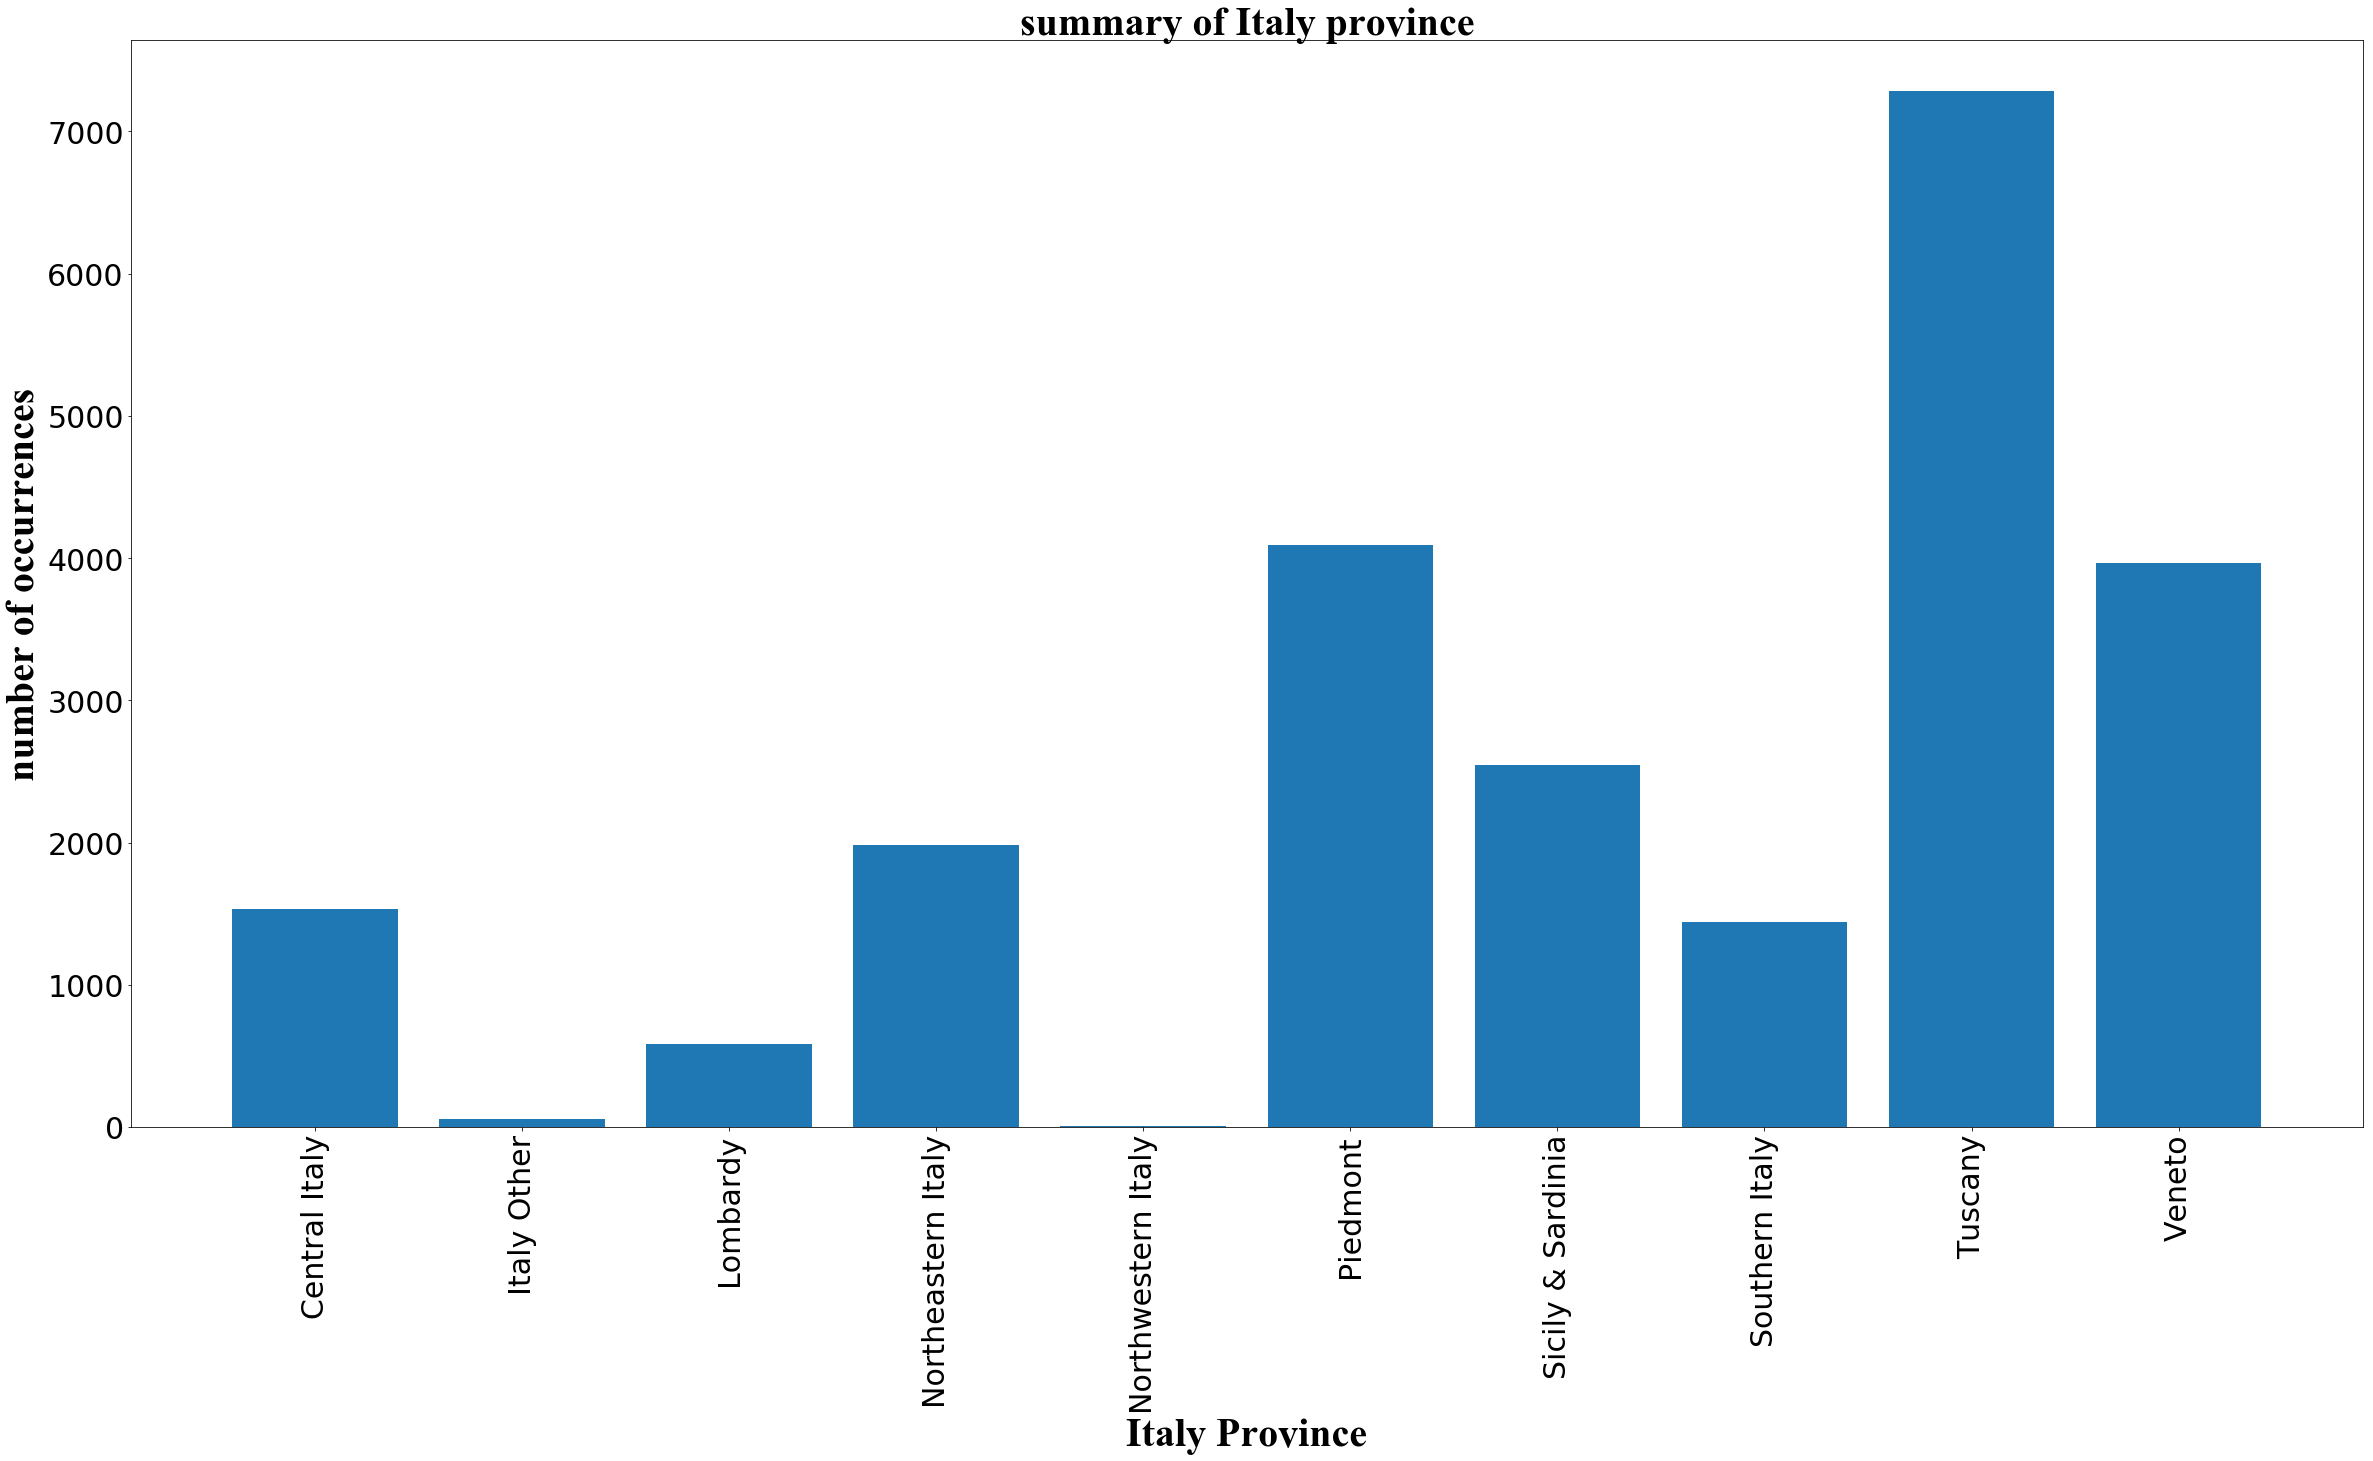

In [120]:
x_ita_pro = Italy_province.index
y_ita_pro = Italy_province.values
plt.figure(figsize=(40,20))
plt.bar(x_ita_pro, y_ita_pro)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('Italy Province', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of Italy province', font)
plt.show()

In [121]:
France = data[data['country'].isin(['France']) == True]

In [122]:
France_province = France[pd.notnull(France['province'])].groupby(by='province').count().iloc[:,0]

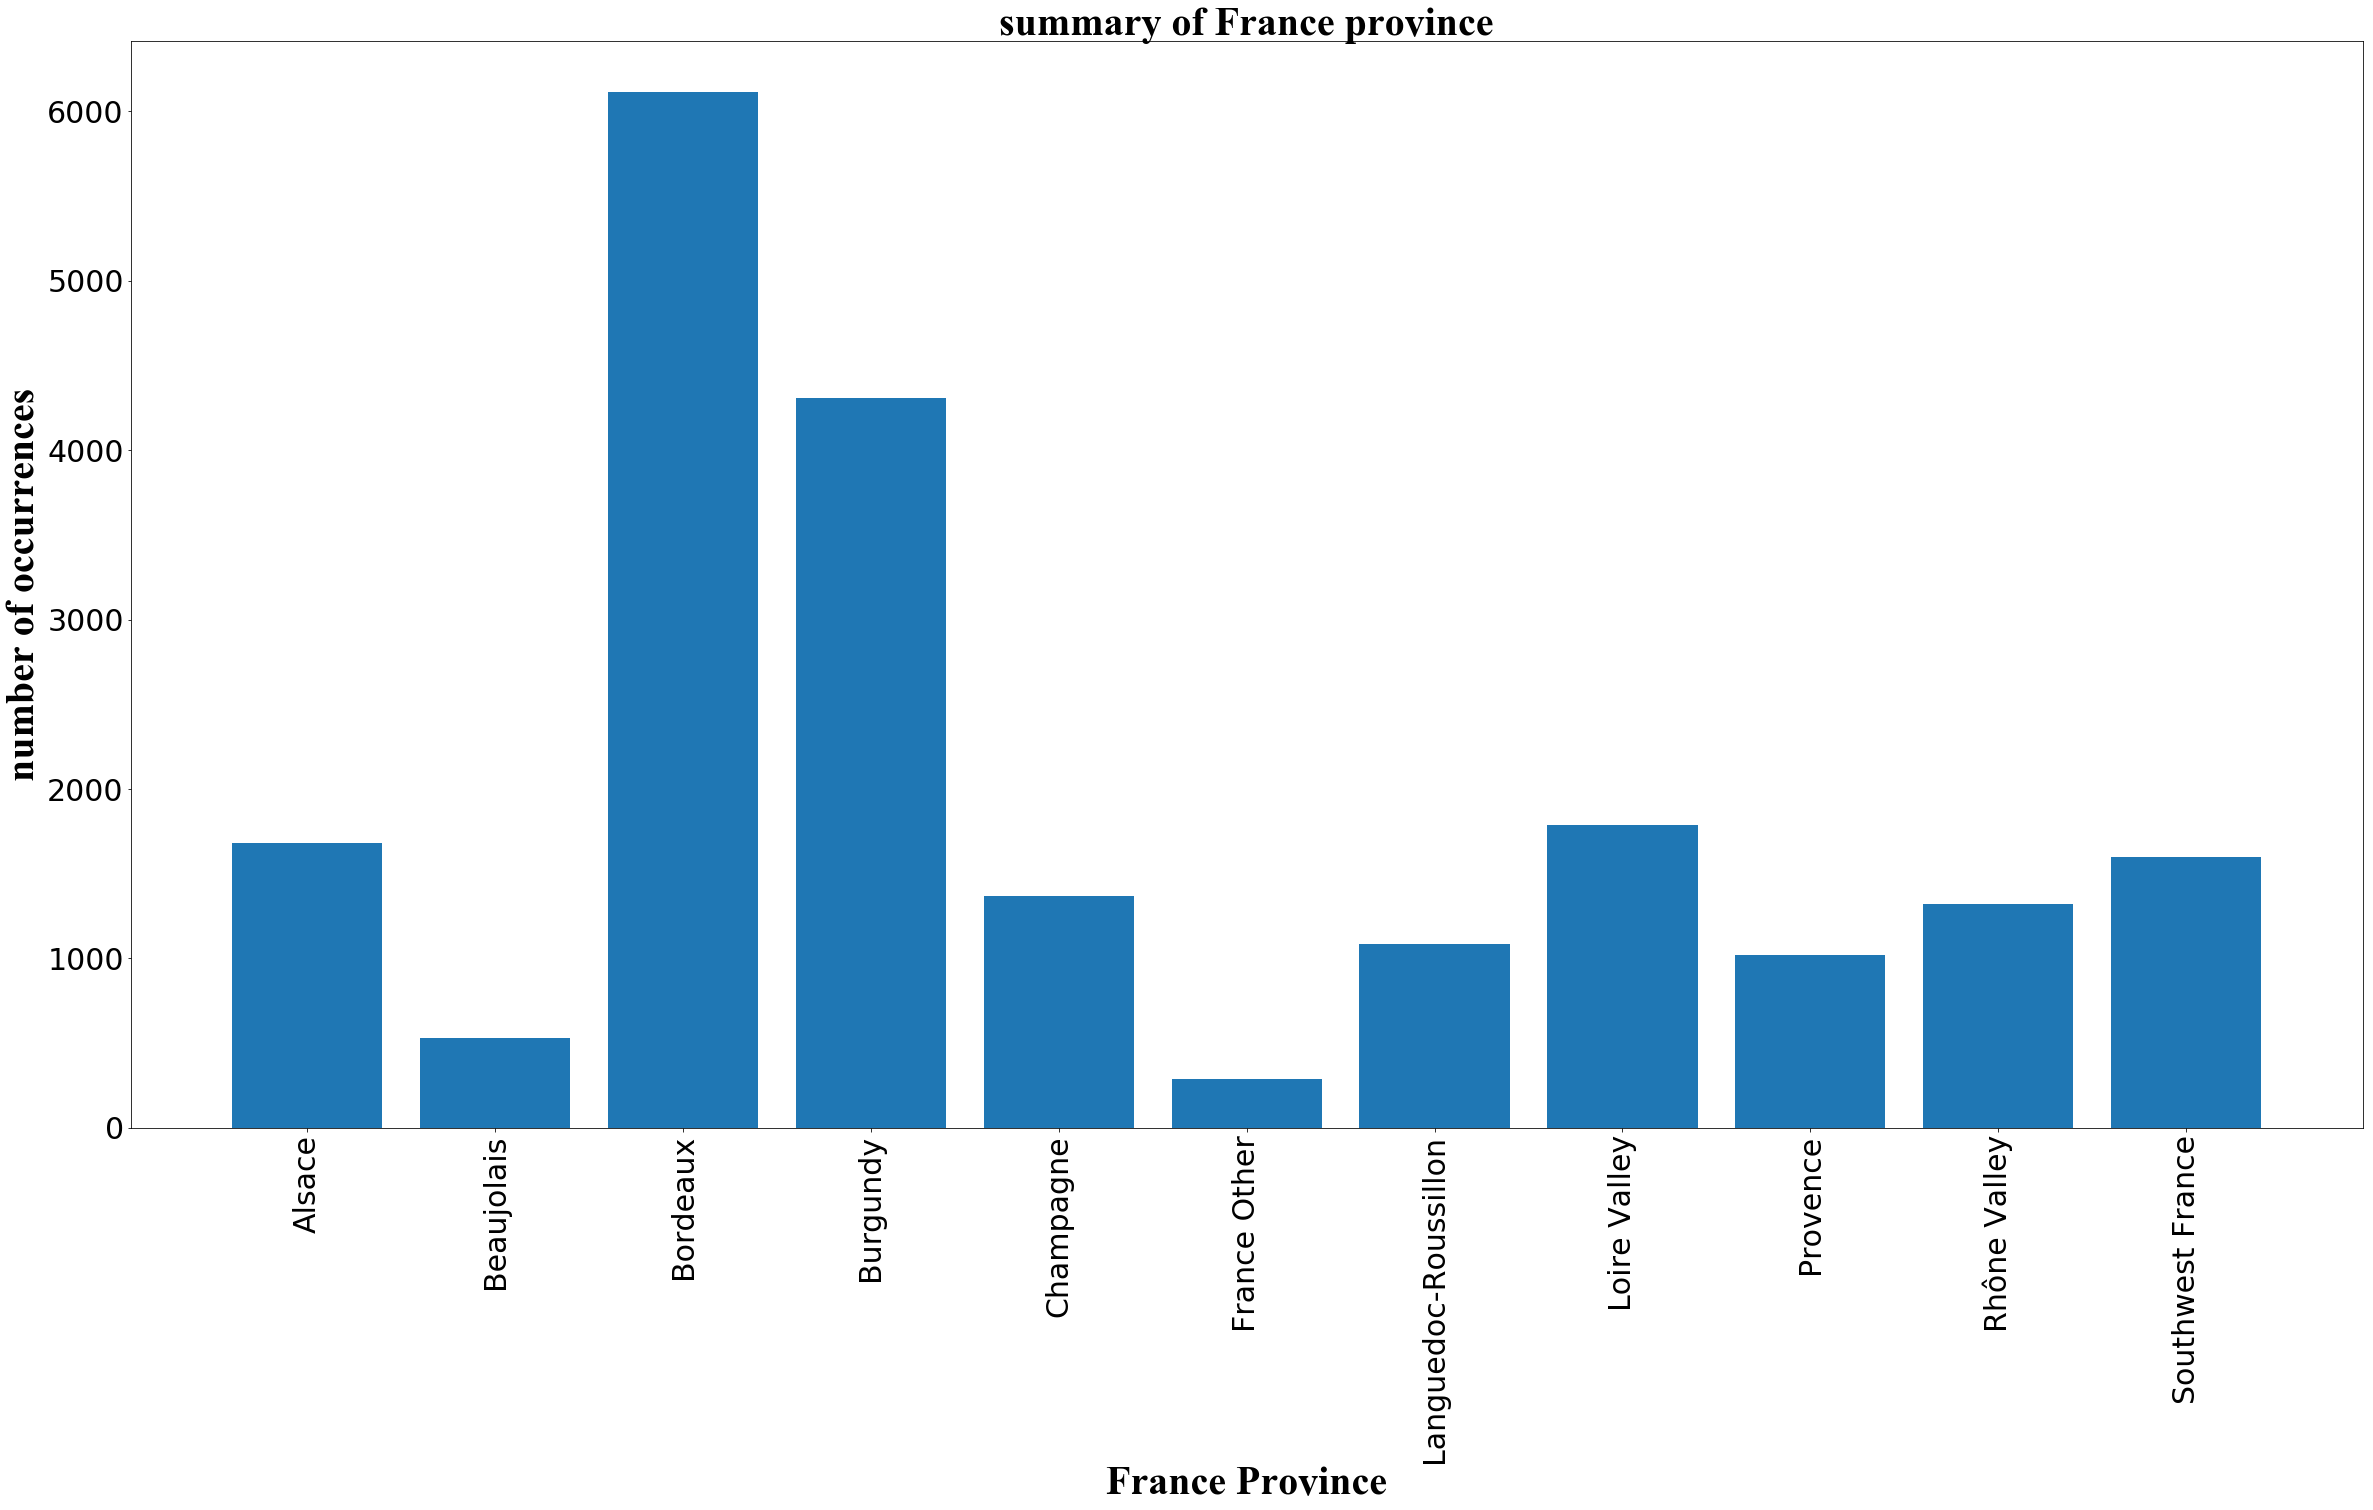

In [123]:
x_fra_pro = France_province.index
y_fra_pro = France_province.values
plt.figure(figsize=(40,20))
plt.bar(x_fra_pro, y_fra_pro)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('France Province', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of France province', font)
plt.show()

# 10对标称属性variety进行分析

In [149]:
variety = data['variety'].value_counts()

## 10.1绘制直方图

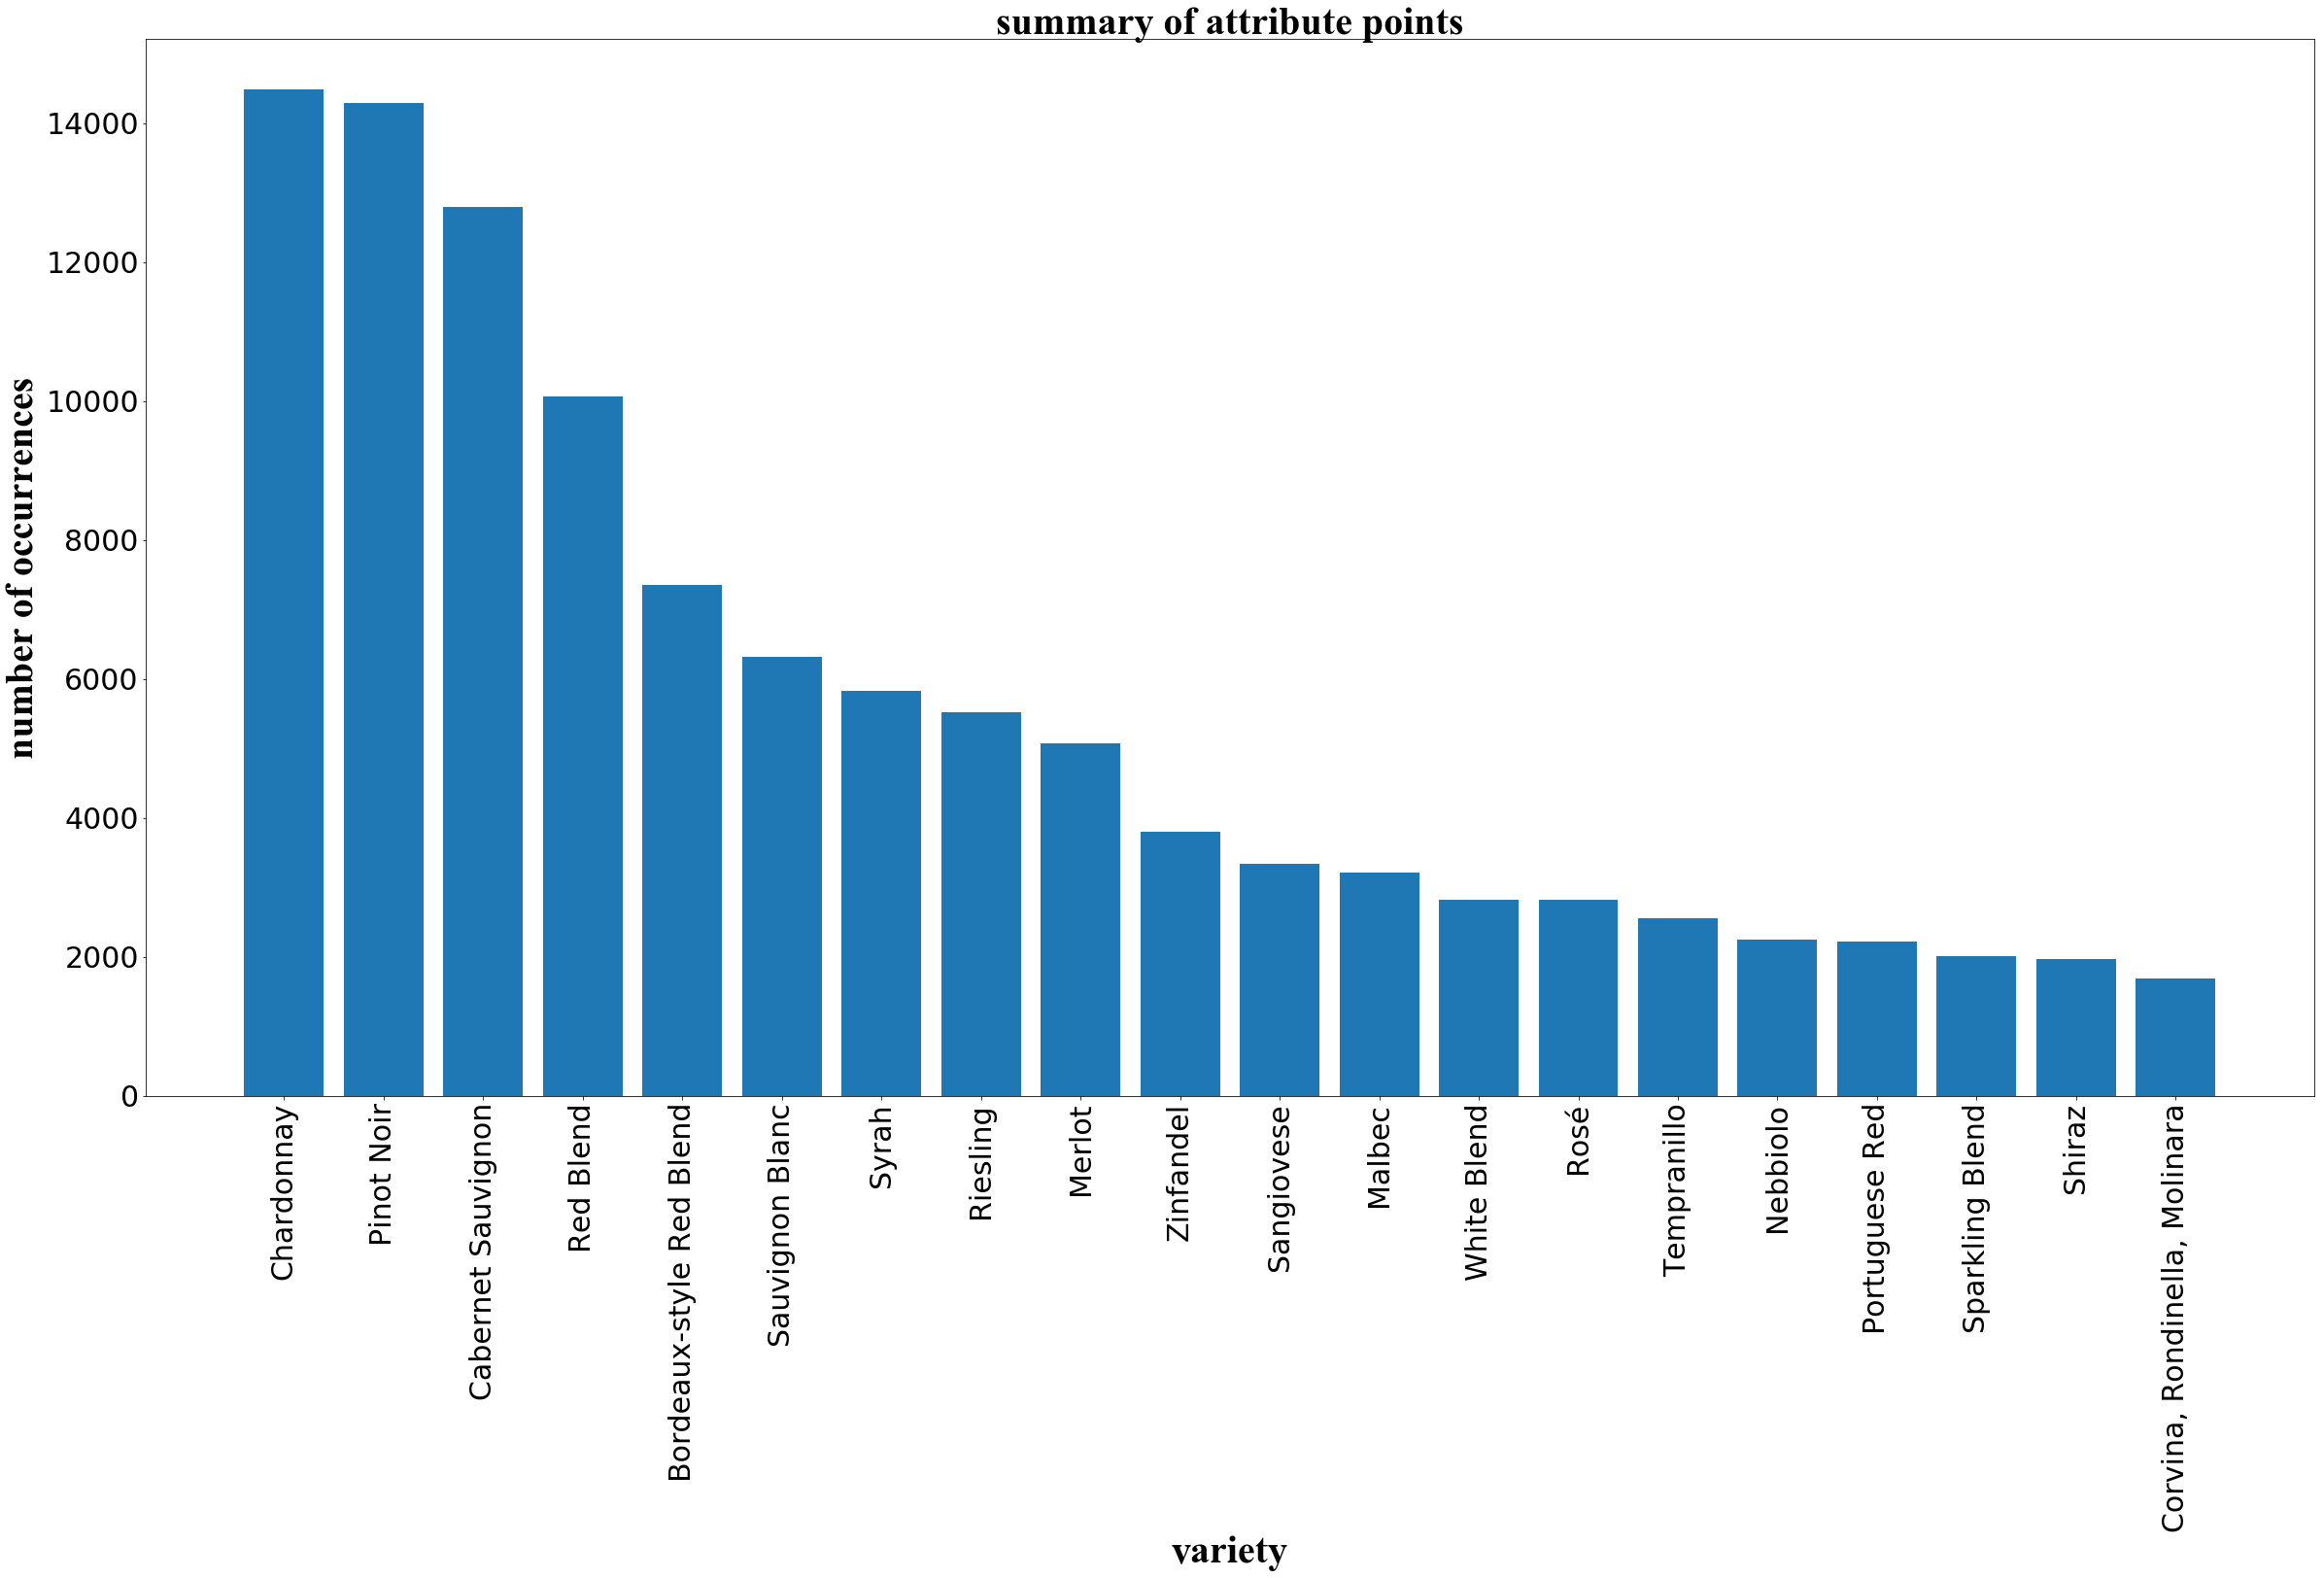

In [153]:
x_var = []
y_var = []
for i in range(20):
    x_var.append(variety.index[i])
    y_var.append(variety[i])
plt.figure(figsize=(40,20))
plt.bar(x_var, y_var)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('variety', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute points', font)
plt.show()

## 10.2处理缺失数据

In [156]:
print('variety数据缺失总数： ',len(data[data['variety'] == 'NONE']))

variety数据缺失总数：  0


# 11对标称属性winery进行分析

In [157]:
winery = data['winery'].value_counts()

## 11.1绘制直方图

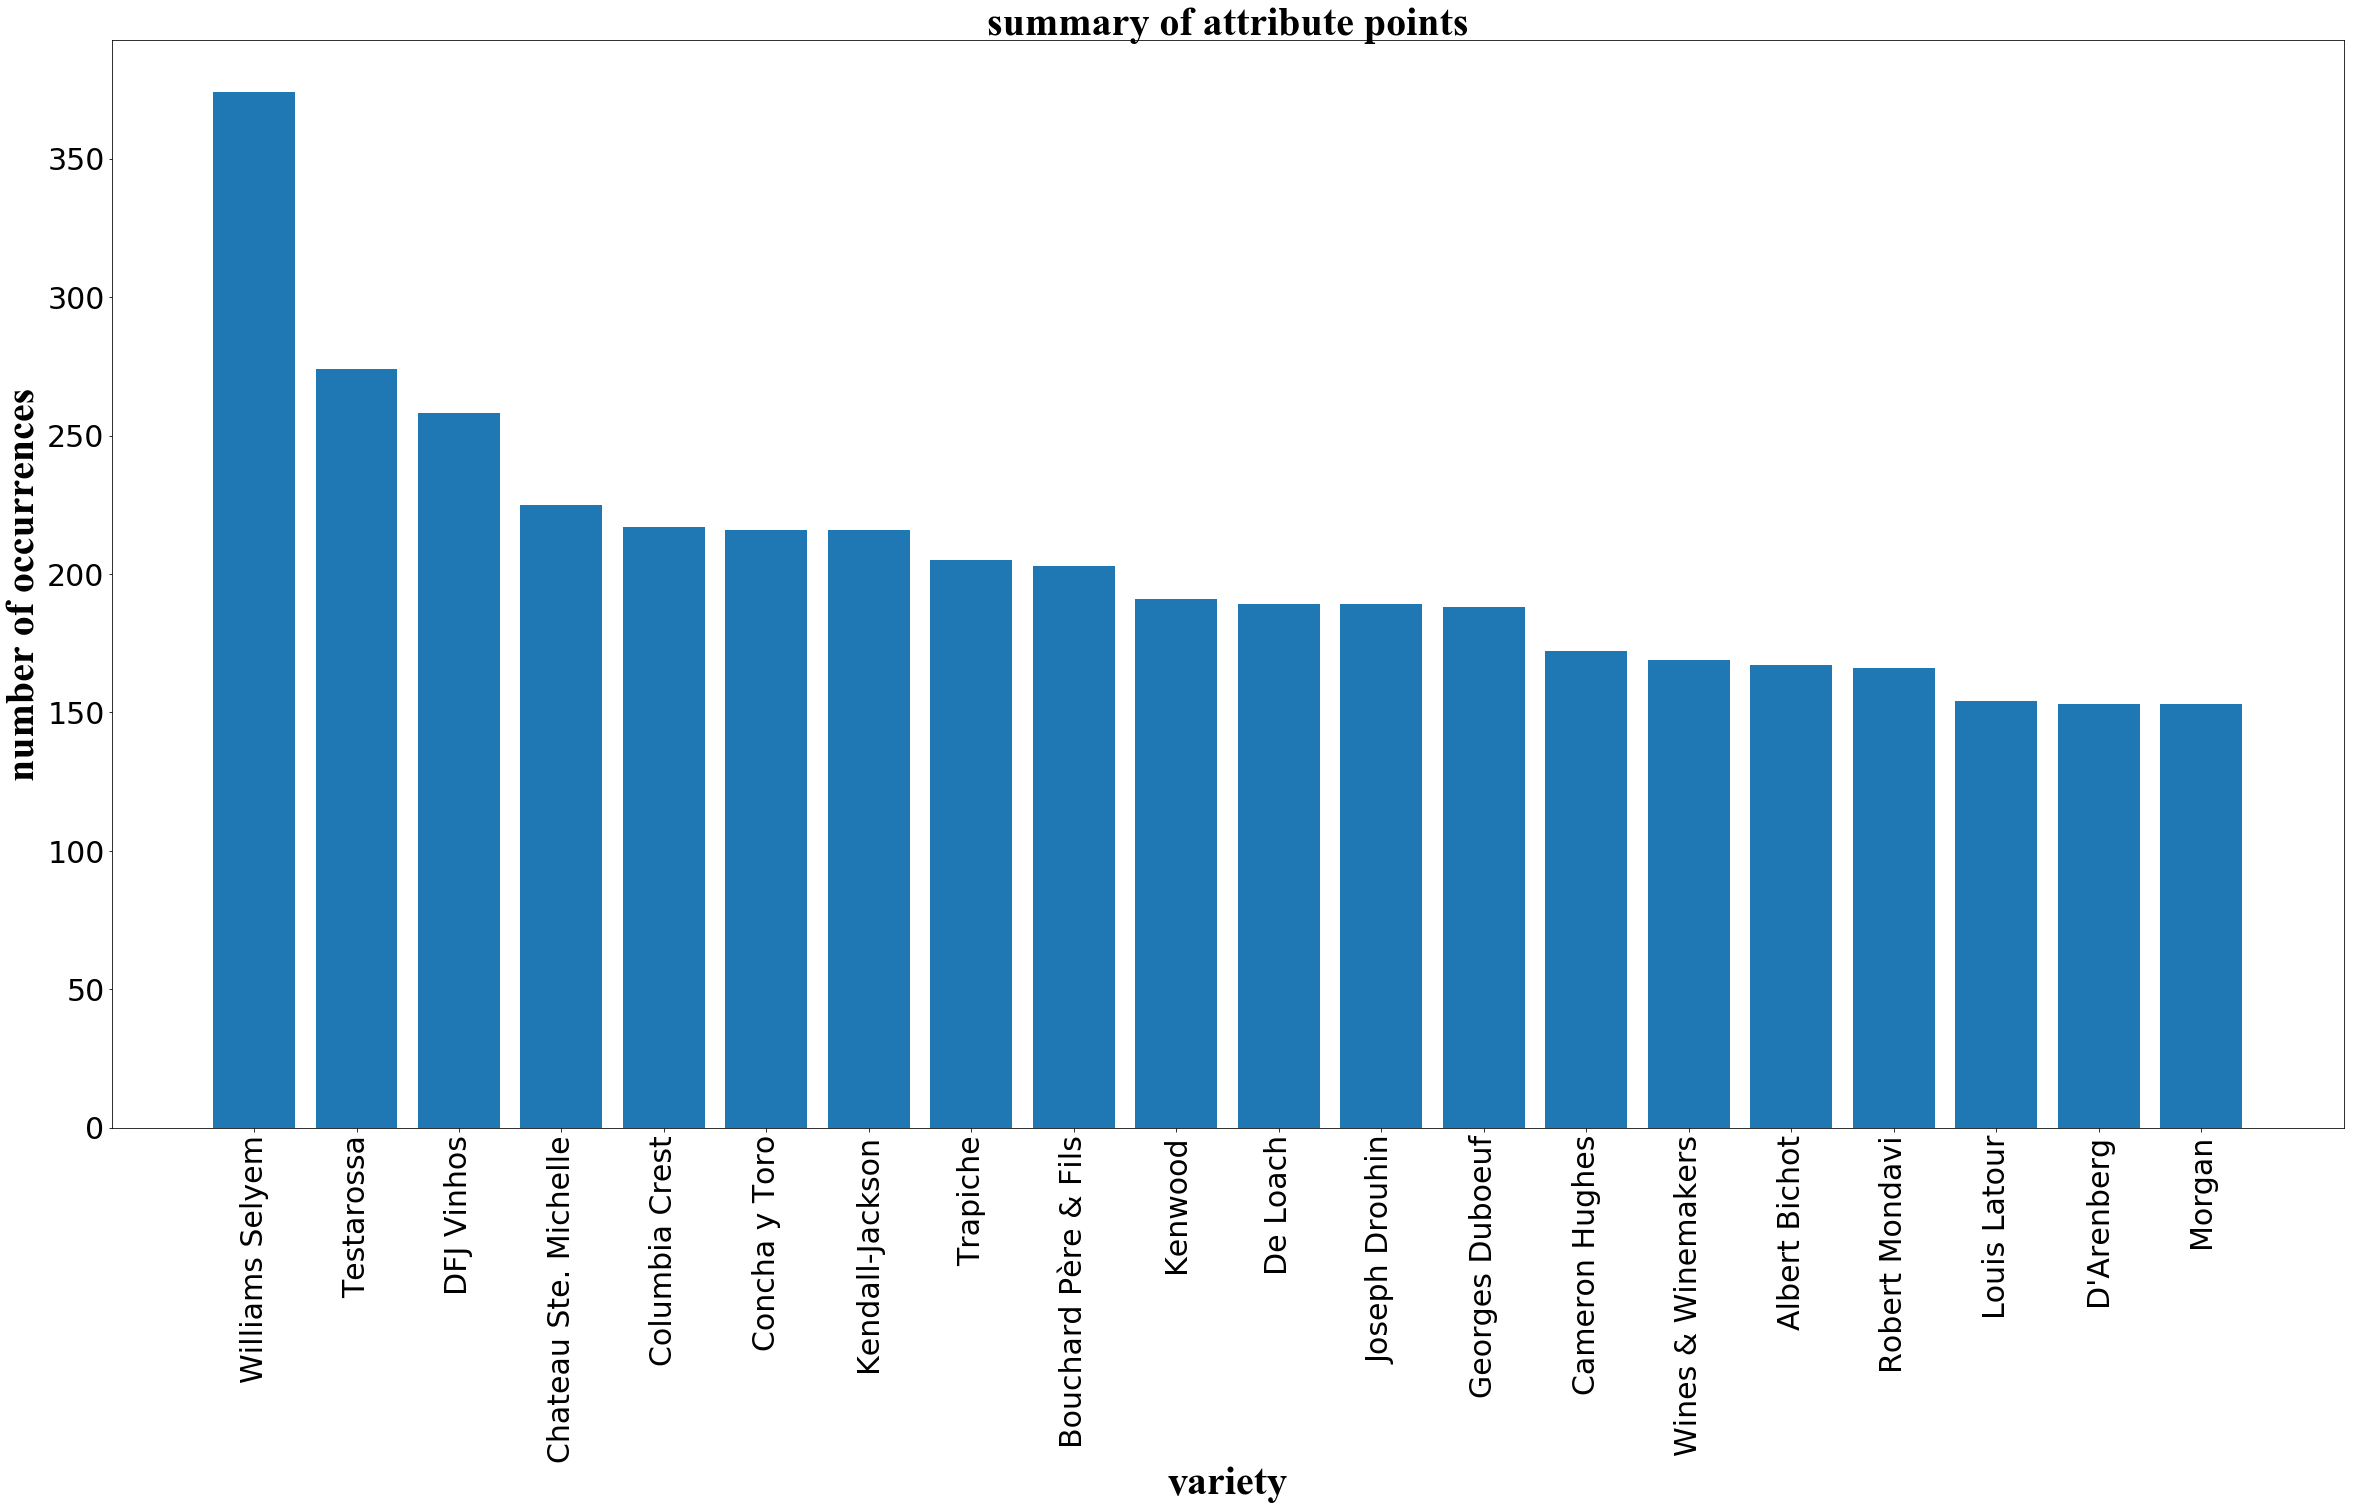

In [158]:
x_win = []
y_win = []
for i in range(20):
    x_win.append(winery.index[i])
    y_win.append(winery[i])
plt.figure(figsize=(40,20))
plt.bar(x_win, y_win)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('variety', font)
plt.ylabel('number of occurrences', font)
plt.title('summary of attribute points', font)
plt.show()

## 11.2处理缺失数据

In [159]:
print('winery数据缺失总数： ',len(data[data['winery'] == 'NONE']))

winery数据缺失总数：  0
